In [1]:
import tensorflow
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [2]:
import pandas as pd
import sklearn
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import nltk
import string
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
import re
from nltk.stem.porter import *

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lucyc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lucyc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
reports = pd.read_csv('nuforc_reports.csv')

In [4]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112095 entries, 0 to 112094
Data columns (total 12 columns):
summary           112059 non-null object
city              111851 non-null object
state             103722 non-null object
date_time         109726 non-null object
shape             108580 non-null object
duration          108382 non-null object
stats             112042 non-null object
report_link       112095 non-null object
text              112041 non-null object
posted            109726 non-null object
city_latitude     89359 non-null float64
city_longitude    89359 non-null float64
dtypes: float64(2), object(10)
memory usage: 10.3+ MB


In [5]:
reports.isnull().sum()

summary              36
city                244
state              8373
date_time          2369
shape              3515
duration           3713
stats                53
report_link           0
text                 54
posted             2369
city_latitude     22736
city_longitude    22736
dtype: int64

# Data Cleaning

### NLP Text

In [6]:
reports[reports['text'].isnull()]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
17151,Glowing fireball object crashed at Maverick's...,El Granada,CA,1995-01-01T02:00:00,fireball,45 seconds,NaN,http://www.nuforc.org/webreports/025/S25864.html,NaN,2002-11-04T00:00:00,37.502700,-122.469400
22560,Objects flickering red and green seemingly hov...,Toronto,ON,2003-08-16T22:30:00,unknown,1 hour 30. minutes +,NaN,http://www.nuforc.org/webreports/030/S30727.html,NaN,2003-08-28T00:00:00,43.675886,-79.414188
24968,Explosion in the sky,New Effington,SD,2004-02-14T20:17:00,unknown,2 seconds,NaN,http://www.nuforc.org/webreports/035/S35101.html,NaN,2004-03-02T00:00:00,45.862000,-96.948100
25235,chevron shaped craft hovering near our home,Monkland,ON,2004-02-19T19:30:00,chevron,30 Minutes,NaN,http://www.nuforc.org/webreports/035/S35193.html,NaN,2004-03-02T00:00:00,45.200100,-74.866000
25984,Bright greenish / white light that flew in a s...,Gatineau,QC,2003-11-26T21:41:00,light,3 Seconds,NaN,http://www.nuforc.org/webreports/033/S33439.html,NaN,2003-12-09T00:00:00,45.484218,-75.670763
27151,"three nights, in one week, glowing green and r...",Santa Fe,NM,2004-05-05T20:30:00,oval,1/2 hour,NaN,http://www.nuforc.org/webreports/036/S36882.html,NaN,2004-06-04T00:00:00,35.661083,-105.953907
27197,ufo at sunset,Seattle,WA,2004-05-12T19:15:00,light,15-20 sec,NaN,http://www.nuforc.org/webreports/036/S36880.html,NaN,2004-06-04T00:00:00,47.609046,-122.326028
27201,oval shape bright as a full moon,Jacksonville,FL,2004-05-13T00:20:00,oval,2 seconds,NaN,http://www.nuforc.org/webreports/036/S36883.html,NaN,2004-06-04T00:00:00,30.266905,-81.616373
27213,lots of UFOs,Perth (Western Australia),NaN,2004-05-13T23:00:00,cigar,50,NaN,http://www.nuforc.org/webreports/036/S36881.html,NaN,2004-06-04T00:00:00,NaN,NaN
27699,"Two separate ""fireball"" incidents in very dist...",Bullhead City,AZ,1987-06-15T18:30:00,fireball,?? 10min ??,NaN,http://www.nuforc.org/webreports/036/S36103.html,NaN,2004-04-27T00:00:00,35.084078,-114.562823


In [7]:
#replace missing text with summary
reports['text']=reports['text'].fillna(value = reports['summary'])

In [8]:
#drop rows where there's no summary or text
# reports = df.dropna(axis=0, how='all', subset=['text','summary'])
reports = reports.dropna(axis=0, how='all', subset=['text','summary'])

In [9]:
reports.isnull().sum()

summary              35
city                244
state              8373
date_time          2369
shape              3515
duration           3713
stats                53
report_link           0
text                  0
posted             2369
city_latitude     22736
city_longitude    22736
dtype: int64

In [10]:
#replace missing text with summary
reports['text'].fillna(value = reports['summary'], inplace=True)

In [11]:
reports['text'].isnull().sum()

0

In [12]:
reports.isnull().sum()

summary              35
city                244
state              8373
date_time          2369
shape              3515
duration           3713
stats                53
report_link           0
text                  0
posted             2369
city_latitude     22736
city_longitude    22736
dtype: int64

In [13]:
def remove_punctuation (text):
  
  new_text = "".join([char for char in text if char not in string.punctuation])
  return new_text

reports['clean_text'] = reports['text'].astype(str).apply(lambda x:remove_punctuation(x))


In [14]:
def tokenize (text):
  tokens = re.split('\W+', text)
  return tokens [1:]

reports['tokenized_text'] = reports['clean_text'].apply(lambda x: tokenize(x))


In [15]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_text):
  text = [word for word in tokenized_text if word not in stopword]
  return text

reports['nostop_text']= reports['tokenized_text'].apply(lambda x:remove_stopwords(x))


### Clean date_time feature and create new features (year, month, day, hour, minute)

In [16]:
reports['date_time'] = pd.to_datetime(reports['date_time'])

In [17]:
# Separate the year, month, day, hour, and minute from our datetime data.

reports['year'] = reports['date_time'].map(lambda x: x.year)
reports['month'] = reports['date_time'].map(lambda x: x.month)
reports['day'] = reports['date_time'].map(lambda x: x.day)
reports['hour'] = reports['date_time'].map(lambda x: x.hour)
reports['minute'] = reports['date_time'].map(lambda x: x.minute)

In [18]:
# Parsing duration for parsable entries
def extract_duration(text):
    if(type(text) != 'str'):
        text = str(text)
    if(text == ""):
        return -1
    elif(not any(char.isdigit() for char in text)):
        return -1
    else:
        # first numeral value
        start_idx = None
        end_idx = None
        units_idx = None
        for i in range(len(text)):
            if(text[i].isdigit()):
                start_idx = i
#                 print("start_idx="+str(start_idx))
                break
#         print("end of loop start_idx:"+str(start_idx))
        for i in range(start_idx,len(text)):
            if(not text[i].isdigit()):
                end_idx = i
#                 print("text["+str(i)+"]="+str(text[i]))
#                 print("end_idx="+str(end_idx))
                break
        if(end_idx == None):
            return -1
        duration_str = text[start_idx:end_idx]
        print("duration_str="+str(duration_str))
        duration = int(duration_str)
        for i in range(end_idx,end_idx+min(5,len(text)-end_idx)):
            if(text[i] == "m" or text[i] == "M" or text[i] == "s" or text[i] == "S" or text[i] == "h" or text[i] == "H"):
                units_idx = i
                break
        if(units_idx == None):
            return -1
        if(text[units_idx] == "h" or text[units_idx] == "H"):
            return duration*3600
        if(text[units_idx] == "m" or text[units_idx] == "M"):
            return duration*60
        if(text[units_idx] == "s" or text[units_idx] == "S"):
            return duration

reports['duration_parsed'] = reports['duration'].apply(lambda x:extract_duration(x))

duration_str=15
duration_str=5
duration_str=90
duration_str=5
duration_str=15
duration_str=45
duration_str=3
duration_str=1
duration_str=5
duration_str=2
duration_str=30
duration_str=30
duration_str=30
duration_str=8
duration_str=1
duration_str=20
duration_str=5
duration_str=5
duration_str=30
duration_str=3
duration_str=5
duration_str=10
duration_str=5
duration_str=30
duration_str=5
duration_str=10
duration_str=10
duration_str=2
duration_str=20
duration_str=1
duration_str=1
duration_str=20
duration_str=4
duration_str=10
duration_str=20
duration_str=4
duration_str=4
duration_str=5
duration_str=30
duration_str=5
duration_str=5
duration_str=1
duration_str=1
duration_str=30
duration_str=5
duration_str=3
duration_str=1
duration_str=5
duration_str=15
duration_str=10
duration_str=10
duration_str=12
duration_str=2
duration_str=3
duration_str=5
duration_str=5
duration_str=30
duration_str=30
duration_str=15
duration_str=3
duration_str=3
duration_str=45
duration_str=15
duration_str=10
duration_st

duration_str=15
duration_str=16
duration_str=1
duration_str=1
duration_str=5
duration_str=2
duration_str=15
duration_str=30
duration_str=5
duration_str=5
duration_str=45
duration_str=2
duration_str=5
duration_str=15
duration_str=2
duration_str=1
duration_str=1
duration_str=0
duration_str=30
duration_str=3
duration_str=1
duration_str=6
duration_str=3
duration_str=2
duration_str=20
duration_str=2
duration_str=10
duration_str=10
duration_str=5
duration_str=6
duration_str=5
duration_str=2
duration_str=5
duration_str=5
duration_str=5
duration_str=10
duration_str=30
duration_str=10
duration_str=30
duration_str=30
duration_str=5
duration_str=30
duration_str=2
duration_str=2
duration_str=10
duration_str=5
duration_str=20
duration_str=15
duration_str=5
duration_str=10
duration_str=1
duration_str=15
duration_str=6
duration_str=5
duration_str=15
duration_str=3
duration_str=2
duration_str=30
duration_str=1
duration_str=10
duration_str=5
duration_str=1
duration_str=10
duration_str=10
duration_str=5

duration_str=30
duration_str=1
duration_str=20
duration_str=2
duration_str=20
duration_str=1
duration_str=8
duration_str=1
duration_str=10
duration_str=2
duration_str=8
duration_str=2
duration_str=60
duration_str=2
duration_str=1
duration_str=30
duration_str=15
duration_str=10
duration_str=20
duration_str=2
duration_str=8
duration_str=30
duration_str=5
duration_str=4
duration_str=3
duration_str=10
duration_str=1
duration_str=1
duration_str=3
duration_str=15
duration_str=3
duration_str=2
duration_str=2
duration_str=5
duration_str=30
duration_str=5
duration_str=10
duration_str=4
duration_str=1
duration_str=4
duration_str=10
duration_str=30
duration_str=15
duration_str=3
duration_str=15
duration_str=2
duration_str=1
duration_str=60
duration_str=3
duration_str=2
duration_str=30
duration_str=20
duration_str=1
duration_str=90
duration_str=1
duration_str=3
duration_str=30
duration_str=1
duration_str=3
duration_str=5
duration_str=5
duration_str=2
duration_str=3
duration_str=20
duration_str=10


duration_str=5
duration_str=30
duration_str=5
duration_str=5
duration_str=2
duration_str=5
duration_str=3
duration_str=30
duration_str=45
duration_str=15
duration_str=15
duration_str=12
duration_str=50
duration_str=5
duration_str=24
duration_str=5
duration_str=5
duration_str=5
duration_str=45
duration_str=7
duration_str=30
duration_str=1
duration_str=1
duration_str=20
duration_str=10
duration_str=15
duration_str=1
duration_str=15
duration_str=3
duration_str=4
duration_str=5
duration_str=2
duration_str=10
duration_str=2
duration_str=8
duration_str=20
duration_str=46
duration_str=10
duration_str=15
duration_str=2
duration_str=1
duration_str=2
duration_str=10
duration_str=6
duration_str=4
duration_str=30
duration_str=5
duration_str=10
duration_str=2
duration_str=10
duration_str=5
duration_str=3
duration_str=9
duration_str=10
duration_str=2
duration_str=20
duration_str=40
duration_str=30
duration_str=50
duration_str=1
duration_str=30
duration_str=1
duration_str=2
duration_str=1
duration_st

duration_str=30
duration_str=1
duration_str=10
duration_str=5
duration_str=5
duration_str=2
duration_str=15
duration_str=2
duration_str=10
duration_str=2
duration_str=1
duration_str=7
duration_str=8
duration_str=2
duration_str=5
duration_str=3
duration_str=10
duration_str=2
duration_str=2
duration_str=1
duration_str=2
duration_str=2
duration_str=3
duration_str=2
duration_str=0
duration_str=3
duration_str=15
duration_str=15
duration_str=5
duration_str=7
duration_str=1
duration_str=15
duration_str=5
duration_str=4
duration_str=15
duration_str=10
duration_str=2
duration_str=1
duration_str=1
duration_str=10
duration_str=6
duration_str=2
duration_str=2
duration_str=15
duration_str=45
duration_str=2
duration_str=5
duration_str=1
duration_str=2
duration_str=5
duration_str=14
duration_str=2
duration_str=1
duration_str=1
duration_str=4
duration_str=1
duration_str=3
duration_str=3
duration_str=1
duration_str=5
duration_str=5
duration_str=3
duration_str=5
duration_str=4
duration_str=5
duration_st

duration_str=2
duration_str=7
duration_str=12
duration_str=21
duration_str=10
duration_str=4
duration_str=15
duration_str=5
duration_str=2
duration_str=3
duration_str=5
duration_str=30
duration_str=30
duration_str=2
duration_str=25
duration_str=10
duration_str=1
duration_str=15
duration_str=30
duration_str=15
duration_str=30
duration_str=0
duration_str=5
duration_str=5
duration_str=30
duration_str=10
duration_str=3
duration_str=30
duration_str=2
duration_str=3
duration_str=50
duration_str=25
duration_str=45
duration_str=2
duration_str=10
duration_str=4
duration_str=30
duration_str=2
duration_str=2
duration_str=15
duration_str=5
duration_str=00
duration_str=5
duration_str=5
duration_str=10
duration_str=10
duration_str=5
duration_str=2
duration_str=30
duration_str=20
duration_str=30
duration_str=30
duration_str=10
duration_str=1
duration_str=1
duration_str=2
duration_str=1
duration_str=30
duration_str=45
duration_str=2
duration_str=1
duration_str=5
duration_str=3
duration_str=30
duration

duration_str=2
duration_str=5
duration_str=5
duration_str=3
duration_str=2
duration_str=1
duration_str=1
duration_str=37
duration_str=30
duration_str=2
duration_str=5
duration_str=8
duration_str=3
duration_str=10
duration_str=2
duration_str=45
duration_str=30
duration_str=20
duration_str=1
duration_str=15
duration_str=5
duration_str=30
duration_str=45
duration_str=15
duration_str=15
duration_str=10
duration_str=30
duration_str=5
duration_str=15
duration_str=10
duration_str=1
duration_str=30
duration_str=3
duration_str=30
duration_str=3
duration_str=2
duration_str=12
duration_str=7
duration_str=5
duration_str=10
duration_str=15
duration_str=5
duration_str=20
duration_str=90
duration_str=2
duration_str=2
duration_str=5
duration_str=2
duration_str=30
duration_str=30
duration_str=10
duration_str=30
duration_str=1
duration_str=2
duration_str=15
duration_str=3
duration_str=60
duration_str=3
duration_str=7
duration_str=2
duration_str=1
duration_str=19
duration_str=15
duration_str=7
duration_s

duration_str=5
duration_str=10
duration_str=7
duration_str=3
duration_str=2
duration_str=1
duration_str=3
duration_str=15
duration_str=4
duration_str=5
duration_str=3
duration_str=5
duration_str=2
duration_str=2
duration_str=10
duration_str=7
duration_str=1
duration_str=1
duration_str=10
duration_str=7
duration_str=10
duration_str=15
duration_str=10
duration_str=2
duration_str=1
duration_str=5
duration_str=30
duration_str=2
duration_str=10
duration_str=3
duration_str=10
duration_str=20
duration_str=6
duration_str=1
duration_str=2
duration_str=5
duration_str=30
duration_str=5
duration_str=10
duration_str=1
duration_str=1
duration_str=2
duration_str=40
duration_str=30
duration_str=10
duration_str=1
duration_str=4
duration_str=4
duration_str=1
duration_str=3
duration_str=19
duration_str=4
duration_str=15
duration_str=15
duration_str=1
duration_str=15
duration_str=30
duration_str=20
duration_str=4
duration_str=5
duration_str=30
duration_str=8
duration_str=1
duration_str=10
duration_str=2
d

duration_str=30
duration_str=4
duration_str=30
duration_str=45
duration_str=5
duration_str=15
duration_str=30
duration_str=3
duration_str=20
duration_str=2
duration_str=10
duration_str=30
duration_str=45
duration_str=20
duration_str=15
duration_str=10
duration_str=8
duration_str=5
duration_str=3
duration_str=1
duration_str=1
duration_str=7
duration_str=5
duration_str=1
duration_str=60
duration_str=1
duration_str=30
duration_str=4
duration_str=20
duration_str=5
duration_str=10
duration_str=2
duration_str=5
duration_str=2
duration_str=10
duration_str=2
duration_str=5
duration_str=05
duration_str=15
duration_str=20
duration_str=10
duration_str=2
duration_str=1
duration_str=30
duration_str=15
duration_str=5
duration_str=10
duration_str=1
duration_str=2
duration_str=10
duration_str=2
duration_str=5
duration_str=3
duration_str=5
duration_str=23
duration_str=10
duration_str=2
duration_str=5
duration_str=1
duration_str=30
duration_str=3
duration_str=10
duration_str=30
duration_str=4
duration_s

duration_str=1
duration_str=3
duration_str=10
duration_str=2
duration_str=5
duration_str=5
duration_str=2
duration_str=1
duration_str=2
duration_str=30
duration_str=5
duration_str=10
duration_str=10
duration_str=10
duration_str=10
duration_str=7
duration_str=2
duration_str=5
duration_str=2
duration_str=20
duration_str=30
duration_str=20
duration_str=0
duration_str=1
duration_str=10
duration_str=8
duration_str=1
duration_str=10
duration_str=30
duration_str=10
duration_str=2
duration_str=15
duration_str=2
duration_str=0
duration_str=5
duration_str=3
duration_str=2
duration_str=1
duration_str=2
duration_str=20
duration_str=20
duration_str=5
duration_str=3
duration_str=30
duration_str=0
duration_str=5
duration_str=30
duration_str=12
duration_str=40
duration_str=12
duration_str=20
duration_str=5
duration_str=10
duration_str=2
duration_str=10
duration_str=10
duration_str=3
duration_str=2
duration_str=7
duration_str=10
duration_str=20
duration_str=3
duration_str=5
duration_str=2
duration_str=

duration_str=4
duration_str=15
duration_str=5
duration_str=2
duration_str=1
duration_str=3
duration_str=1
duration_str=30
duration_str=45
duration_str=2
duration_str=15
duration_str=5
duration_str=1
duration_str=5
duration_str=2
duration_str=5
duration_str=2
duration_str=5
duration_str=5
duration_str=15
duration_str=30
duration_str=1
duration_str=2
duration_str=3
duration_str=1
duration_str=4
duration_str=2
duration_str=5
duration_str=5
duration_str=10
duration_str=3
duration_str=8
duration_str=3
duration_str=1
duration_str=2
duration_str=20
duration_str=1
duration_str=5
duration_str=5
duration_str=25
duration_str=3
duration_str=20
duration_str=20
duration_str=3
duration_str=15
duration_str=1
duration_str=1
duration_str=30
duration_str=1
duration_str=10
duration_str=3
duration_str=30
duration_str=1
duration_str=1
duration_str=3
duration_str=3
duration_str=20
duration_str=40
duration_str=1
duration_str=15
duration_str=2
duration_str=15
duration_str=45
duration_str=4
duration_str=15
dura

duration_str=1
duration_str=10
duration_str=20
duration_str=10
duration_str=3
duration_str=5
duration_str=20
duration_str=1
duration_str=45
duration_str=5
duration_str=10
duration_str=1
duration_str=20
duration_str=20
duration_str=30
duration_str=5
duration_str=5
duration_str=8
duration_str=4
duration_str=3
duration_str=10
duration_str=2
duration_str=20
duration_str=30
duration_str=5
duration_str=2
duration_str=20
duration_str=3
duration_str=2
duration_str=20
duration_str=2
duration_str=10
duration_str=15
duration_str=10
duration_str=15
duration_str=6
duration_str=5
duration_str=1
duration_str=9
duration_str=5
duration_str=830
duration_str=2
duration_str=10
duration_str=10
duration_str=15
duration_str=10
duration_str=15
duration_str=30
duration_str=2
duration_str=5
duration_str=10
duration_str=5
duration_str=1
duration_str=30
duration_str=10
duration_str=5
duration_str=30
duration_str=3
duration_str=1
duration_str=5
duration_str=15
duration_str=8
duration_str=23
duration_str=2
duration

duration_str=5
duration_str=90
duration_str=10
duration_str=10
duration_str=20
duration_str=10
duration_str=45
duration_str=5
duration_str=4
duration_str=1
duration_str=1
duration_str=5
duration_str=10
duration_str=3
duration_str=2
duration_str=15
duration_str=12
duration_str=2
duration_str=3
duration_str=3
duration_str=6
duration_str=10
duration_str=2
duration_str=60
duration_str=5
duration_str=9
duration_str=5
duration_str=20
duration_str=5
duration_str=5
duration_str=3
duration_str=30
duration_str=1
duration_str=10
duration_str=2
duration_str=45
duration_str=15
duration_str=25
duration_str=2
duration_str=1
duration_str=5
duration_str=30
duration_str=10
duration_str=20
duration_str=3
duration_str=15
duration_str=10
duration_str=10
duration_str=20
duration_str=3
duration_str=7
duration_str=8
duration_str=15
duration_str=00
duration_str=5
duration_str=30
duration_str=5
duration_str=10
duration_str=15
duration_str=10
duration_str=3
duration_str=50
duration_str=5
duration_str=3
duration_

duration_str=4
duration_str=30
duration_str=30
duration_str=2
duration_str=15
duration_str=1
duration_str=1
duration_str=20
duration_str=10
duration_str=20
duration_str=1
duration_str=1
duration_str=1
duration_str=3
duration_str=25
duration_str=30
duration_str=5
duration_str=30
duration_str=45
duration_str=10
duration_str=1
duration_str=10
duration_str=20
duration_str=1
duration_str=2
duration_str=1
duration_str=5
duration_str=10
duration_str=3
duration_str=15
duration_str=2
duration_str=4
duration_str=1
duration_str=15
duration_str=3
duration_str=5
duration_str=10
duration_str=1
duration_str=45
duration_str=1
duration_str=10
duration_str=15
duration_str=20
duration_str=5
duration_str=20
duration_str=2
duration_str=1
duration_str=1
duration_str=0
duration_str=20
duration_str=15
duration_str=3
duration_str=15
duration_str=35
duration_str=5
duration_str=5
duration_str=3
duration_str=1
duration_str=10
duration_str=3
duration_str=15
duration_str=6
duration_str=40
duration_str=2
duration_st

duration_str=30
duration_str=3
duration_str=45
duration_str=5
duration_str=6
duration_str=1
duration_str=4
duration_str=2
duration_str=20
duration_str=25
duration_str=30
duration_str=2
duration_str=2
duration_str=3
duration_str=1
duration_str=30
duration_str=15
duration_str=5
duration_str=5
duration_str=15
duration_str=1
duration_str=3
duration_str=4
duration_str=15
duration_str=20
duration_str=3
duration_str=3
duration_str=3
duration_str=7
duration_str=2
duration_str=3
duration_str=15
duration_str=30
duration_str=10
duration_str=20
duration_str=2
duration_str=20
duration_str=7
duration_str=22
duration_str=1
duration_str=1
duration_str=10
duration_str=30
duration_str=20
duration_str=30
duration_str=4
duration_str=5
duration_str=5
duration_str=10
duration_str=2
duration_str=20
duration_str=15
duration_str=20
duration_str=4
duration_str=45
duration_str=15
duration_str=10
duration_str=5
duration_str=30
duration_str=10
duration_str=2
duration_str=20
duration_str=3
duration_str=2
duration_s

duration_str=1
duration_str=3
duration_str=15
duration_str=30
duration_str=3
duration_str=3
duration_str=8
duration_str=16
duration_str=7
duration_str=4
duration_str=30
duration_str=5
duration_str=5
duration_str=10
duration_str=20
duration_str=5
duration_str=5
duration_str=15
duration_str=7
duration_str=10
duration_str=30
duration_str=3
duration_str=5
duration_str=3
duration_str=10
duration_str=5
duration_str=20
duration_str=4
duration_str=4
duration_str=5
duration_str=1
duration_str=2
duration_str=5
duration_str=45
duration_str=5
duration_str=5
duration_str=3
duration_str=9
duration_str=20
duration_str=10
duration_str=2
duration_str=10
duration_str=5
duration_str=2
duration_str=3
duration_str=60
duration_str=1
duration_str=3
duration_str=30
duration_str=3
duration_str=4
duration_str=35
duration_str=5
duration_str=30
duration_str=30
duration_str=30
duration_str=7
duration_str=5
duration_str=1
duration_str=10
duration_str=1
duration_str=1
duration_str=10
duration_str=3
duration_str=1
du

duration_str=20
duration_str=5
duration_str=3
duration_str=2
duration_str=1
duration_str=12
duration_str=45
duration_str=10
duration_str=10
duration_str=2
duration_str=2
duration_str=10
duration_str=20
duration_str=20
duration_str=30
duration_str=2
duration_str=15
duration_str=7
duration_str=3
duration_str=1
duration_str=22
duration_str=10
duration_str=2
duration_str=4
duration_str=20
duration_str=2
duration_str=5
duration_str=20
duration_str=5
duration_str=2
duration_str=10
duration_str=10
duration_str=20
duration_str=15
duration_str=5
duration_str=30
duration_str=3
duration_str=5
duration_str=5
duration_str=45
duration_str=8
duration_str=1
duration_str=5
duration_str=5
duration_str=15
duration_str=30
duration_str=1
duration_str=20
duration_str=1
duration_str=1
duration_str=3
duration_str=45
duration_str=30
duration_str=2
duration_str=5
duration_str=15
duration_str=5
duration_str=10
duration_str=2
duration_str=1
duration_str=10
duration_str=45
duration_str=2
duration_str=25
duration_s

duration_str=15
duration_str=10
duration_str=1
duration_str=5
duration_str=1
duration_str=10
duration_str=3
duration_str=15
duration_str=3
duration_str=3
duration_str=2
duration_str=1
duration_str=10
duration_str=15
duration_str=2
duration_str=30
duration_str=1
duration_str=3
duration_str=4
duration_str=5
duration_str=3
duration_str=45
duration_str=20
duration_str=45
duration_str=10
duration_str=15
duration_str=20
duration_str=1
duration_str=2
duration_str=1
duration_str=10
duration_str=2
duration_str=40
duration_str=15
duration_str=2
duration_str=15
duration_str=3
duration_str=10
duration_str=2
duration_str=2
duration_str=10
duration_str=5
duration_str=5
duration_str=45
duration_str=2
duration_str=30
duration_str=10
duration_str=1
duration_str=2
duration_str=10
duration_str=45
duration_str=5
duration_str=6
duration_str=1
duration_str=5
duration_str=15
duration_str=15
duration_str=30
duration_str=5
duration_str=15
duration_str=1
duration_str=2
duration_str=1
duration_str=1
duration_str

duration_str=30
duration_str=2
duration_str=1
duration_str=35
duration_str=30
duration_str=2
duration_str=3
duration_str=30
duration_str=10
duration_str=10
duration_str=2
duration_str=15
duration_str=30
duration_str=10
duration_str=10
duration_str=15
duration_str=4
duration_str=3
duration_str=5
duration_str=10
duration_str=10
duration_str=2
duration_str=10
duration_str=3
duration_str=3
duration_str=7
duration_str=1
duration_str=3
duration_str=13
duration_str=10
duration_str=10
duration_str=1
duration_str=4
duration_str=10
duration_str=4
duration_str=2
duration_str=24
duration_str=10
duration_str=10
duration_str=20
duration_str=8
duration_str=30
duration_str=2
duration_str=45
duration_str=1
duration_str=15
duration_str=1
duration_str=2
duration_str=30
duration_str=10
duration_str=40
duration_str=10
duration_str=2
duration_str=5
duration_str=2
duration_str=25
duration_str=5
duration_str=3
duration_str=30
duration_str=45
duration_str=1
duration_str=5
duration_str=2
duration_str=10
duratio

duration_str=5
duration_str=2
duration_str=40
duration_str=10
duration_str=20
duration_str=90
duration_str=20
duration_str=25
duration_str=5
duration_str=2
duration_str=1
duration_str=20
duration_str=15
duration_str=5
duration_str=10
duration_str=15
duration_str=3
duration_str=2
duration_str=3
duration_str=20
duration_str=3
duration_str=6
duration_str=10
duration_str=3
duration_str=10
duration_str=5
duration_str=06
duration_str=15
duration_str=20
duration_str=3
duration_str=30
duration_str=15
duration_str=3
duration_str=5
duration_str=5
duration_str=1
duration_str=15
duration_str=2
duration_str=1
duration_str=30
duration_str=5
duration_str=10
duration_str=15
duration_str=1
duration_str=1
duration_str=30
duration_str=2
duration_str=10
duration_str=20
duration_str=1
duration_str=3
duration_str=19
duration_str=7
duration_str=2
duration_str=30
duration_str=10
duration_str=3
duration_str=3
duration_str=30
duration_str=1
duration_str=1
duration_str=15
duration_str=20
duration_str=3
duration_

duration_str=3
duration_str=2
duration_str=2
duration_str=2
duration_str=15
duration_str=1
duration_str=5
duration_str=32
duration_str=12
duration_str=30
duration_str=1
duration_str=23
duration_str=30
duration_str=2
duration_str=10
duration_str=2
duration_str=30
duration_str=1
duration_str=40
duration_str=15
duration_str=50
duration_str=20
duration_str=10
duration_str=10
duration_str=30
duration_str=4
duration_str=15
duration_str=20
duration_str=20
duration_str=4
duration_str=2
duration_str=10
duration_str=1
duration_str=2
duration_str=1
duration_str=5
duration_str=1
duration_str=2
duration_str=15
duration_str=10
duration_str=10
duration_str=2
duration_str=30
duration_str=15
duration_str=2
duration_str=1
duration_str=10
duration_str=2
duration_str=2
duration_str=2
duration_str=2
duration_str=10
duration_str=1
duration_str=5
duration_str=2
duration_str=10
duration_str=5
duration_str=15
duration_str=2
duration_str=15
duration_str=15
duration_str=30
duration_str=5
duration_str=5
duration_

duration_str=2
duration_str=45
duration_str=10
duration_str=20
duration_str=10
duration_str=15
duration_str=6
duration_str=3
duration_str=3
duration_str=4
duration_str=5
duration_str=15
duration_str=5
duration_str=4
duration_str=5
duration_str=5
duration_str=1
duration_str=1
duration_str=4
duration_str=10
duration_str=15
duration_str=12
duration_str=1
duration_str=3
duration_str=2
duration_str=1
duration_str=1
duration_str=30
duration_str=40
duration_str=5
duration_str=15
duration_str=8
duration_str=20
duration_str=30
duration_str=10
duration_str=10
duration_str=30
duration_str=2
duration_str=45
duration_str=2
duration_str=5
duration_str=30
duration_str=3
duration_str=5
duration_str=10
duration_str=45
duration_str=20
duration_str=2
duration_str=20
duration_str=20
duration_str=5
duration_str=2
duration_str=1
duration_str=1
duration_str=4
duration_str=3
duration_str=5
duration_str=2
duration_str=2
duration_str=10
duration_str=3
duration_str=2
duration_str=5
duration_str=15
duration_str=1

duration_str=5
duration_str=20
duration_str=15
duration_str=4
duration_str=10
duration_str=1
duration_str=30
duration_str=5
duration_str=1
duration_str=15
duration_str=3
duration_str=10
duration_str=1
duration_str=20
duration_str=18
duration_str=15
duration_str=15
duration_str=2
duration_str=2
duration_str=5
duration_str=2
duration_str=25
duration_str=50
duration_str=40
duration_str=15
duration_str=1
duration_str=1
duration_str=13
duration_str=50
duration_str=1
duration_str=30
duration_str=10
duration_str=2
duration_str=6
duration_str=3
duration_str=15
duration_str=5
duration_str=4
duration_str=11
duration_str=15
duration_str=5
duration_str=7
duration_str=10
duration_str=45
duration_str=30
duration_str=20
duration_str=3
duration_str=5
duration_str=10
duration_str=5
duration_str=2
duration_str=150
duration_str=8
duration_str=5
duration_str=5
duration_str=7
duration_str=44
duration_str=1
duration_str=1
duration_str=15
duration_str=3
duration_str=5
duration_str=120
duration_str=2
duration

duration_str=30
duration_str=20
duration_str=30
duration_str=10
duration_str=1
duration_str=1
duration_str=5
duration_str=15
duration_str=10
duration_str=5
duration_str=4
duration_str=3
duration_str=1
duration_str=2
duration_str=2
duration_str=10
duration_str=10
duration_str=5
duration_str=10
duration_str=1
duration_str=40
duration_str=5
duration_str=3
duration_str=20
duration_str=15
duration_str=5
duration_str=4
duration_str=3
duration_str=15
duration_str=10
duration_str=7
duration_str=2
duration_str=2
duration_str=10
duration_str=45
duration_str=5
duration_str=30
duration_str=10
duration_str=6
duration_str=30
duration_str=5
duration_str=15
duration_str=30
duration_str=30
duration_str=1
duration_str=5
duration_str=10
duration_str=5
duration_str=10
duration_str=3
duration_str=10
duration_str=6
duration_str=1
duration_str=2
duration_str=15
duration_str=30
duration_str=2
duration_str=30
duration_str=15
duration_str=30
duration_str=2
duration_str=2
duration_str=5
duration_str=10
duration_

duration_str=1
duration_str=30
duration_str=2
duration_str=6
duration_str=10
duration_str=1
duration_str=20
duration_str=10
duration_str=15
duration_str=1
duration_str=10
duration_str=4
duration_str=15
duration_str=2
duration_str=30
duration_str=4
duration_str=1
duration_str=10
duration_str=12
duration_str=2
duration_str=5
duration_str=20
duration_str=2
duration_str=15
duration_str=5
duration_str=2
duration_str=15
duration_str=5
duration_str=10
duration_str=30
duration_str=15
duration_str=10
duration_str=1
duration_str=30
duration_str=45
duration_str=10
duration_str=15
duration_str=45
duration_str=5
duration_str=10
duration_str=1
duration_str=10
duration_str=15
duration_str=30
duration_str=1
duration_str=30
duration_str=20
duration_str=1
duration_str=30
duration_str=2
duration_str=20
duration_str=25
duration_str=5
duration_str=5
duration_str=30
duration_str=7
duration_str=2
duration_str=15
duration_str=2
duration_str=1
duration_str=20
duration_str=3
duration_str=5
duration_str=15
durat

duration_str=10
duration_str=3
duration_str=5
duration_str=5
duration_str=5
duration_str=5
duration_str=3
duration_str=2
duration_str=4
duration_str=1
duration_str=5
duration_str=5
duration_str=2
duration_str=2
duration_str=23
duration_str=10
duration_str=2
duration_str=5
duration_str=1
duration_str=3
duration_str=15
duration_str=5
duration_str=5
duration_str=2
duration_str=10
duration_str=30
duration_str=2
duration_str=3
duration_str=2
duration_str=15
duration_str=4
duration_str=15
duration_str=25
duration_str=10
duration_str=5
duration_str=10
duration_str=10
duration_str=5
duration_str=1
duration_str=3
duration_str=5
duration_str=45
duration_str=2
duration_str=20
duration_str=20
duration_str=45
duration_str=20
duration_str=5
duration_str=34
duration_str=10
duration_str=07
duration_str=3
duration_str=5
duration_str=10
duration_str=30
duration_str=1
duration_str=1
duration_str=2
duration_str=20
duration_str=1
duration_str=2
duration_str=16
duration_str=1
duration_str=20
duration_str=1


duration_str=5
duration_str=10
duration_str=5
duration_str=20
duration_str=3
duration_str=30
duration_str=15
duration_str=2
duration_str=2
duration_str=8
duration_str=15
duration_str=60
duration_str=3
duration_str=35
duration_str=15
duration_str=1
duration_str=15
duration_str=5
duration_str=10
duration_str=5
duration_str=19
duration_str=5
duration_str=8
duration_str=5
duration_str=10
duration_str=30
duration_str=15
duration_str=15
duration_str=5
duration_str=5
duration_str=1
duration_str=5
duration_str=1
duration_str=30
duration_str=15
duration_str=5
duration_str=15
duration_str=20
duration_str=5
duration_str=2
duration_str=10
duration_str=2
duration_str=30
duration_str=20
duration_str=2
duration_str=10
duration_str=3
duration_str=10
duration_str=45
duration_str=5
duration_str=10
duration_str=3
duration_str=1
duration_str=15
duration_str=7
duration_str=30
duration_str=1
duration_str=20
duration_str=2
duration_str=30
duration_str=30
duration_str=20
duration_str=2
duration_str=4
duration

duration_str=1
duration_str=10
duration_str=30
duration_str=35
duration_str=3
duration_str=1
duration_str=5
duration_str=8
duration_str=5
duration_str=5
duration_str=5
duration_str=3
duration_str=5
duration_str=2
duration_str=30
duration_str=5
duration_str=8
duration_str=2
duration_str=2
duration_str=5
duration_str=5
duration_str=10
duration_str=2
duration_str=5
duration_str=1
duration_str=20
duration_str=2
duration_str=1
duration_str=30
duration_str=10
duration_str=5
duration_str=30
duration_str=15
duration_str=10
duration_str=10
duration_str=10
duration_str=2
duration_str=4
duration_str=1
duration_str=5
duration_str=30
duration_str=15
duration_str=5
duration_str=4
duration_str=3
duration_str=1
duration_str=15
duration_str=2
duration_str=15
duration_str=10
duration_str=3
duration_str=6
duration_str=3
duration_str=20
duration_str=30
duration_str=2
duration_str=2
duration_str=10
duration_str=15
duration_str=2
duration_str=4
duration_str=5
duration_str=20
duration_str=10
duration_str=30


duration_str=15
duration_str=5
duration_str=3
duration_str=30
duration_str=2
duration_str=4
duration_str=30
duration_str=10
duration_str=1
duration_str=2
duration_str=15
duration_str=30
duration_str=3
duration_str=5
duration_str=1
duration_str=30
duration_str=20
duration_str=3
duration_str=6
duration_str=7
duration_str=15
duration_str=2
duration_str=30
duration_str=1
duration_str=1
duration_str=5
duration_str=2
duration_str=2
duration_str=45
duration_str=1
duration_str=1
duration_str=3
duration_str=30
duration_str=3
duration_str=30
duration_str=15
duration_str=20
duration_str=20
duration_str=45
duration_str=2
duration_str=30
duration_str=2
duration_str=10
duration_str=5
duration_str=1
duration_str=45
duration_str=3
duration_str=45
duration_str=4
duration_str=10
duration_str=5
duration_str=1
duration_str=10
duration_str=30
duration_str=25
duration_str=45
duration_str=15
duration_str=2
duration_str=60
duration_str=10
duration_str=4
duration_str=1
duration_str=30
duration_str=5
duration_s

duration_str=6
duration_str=2
duration_str=1
duration_str=2
duration_str=3
duration_str=2
duration_str=10
duration_str=10
duration_str=5
duration_str=7
duration_str=13
duration_str=3
duration_str=8
duration_str=10
duration_str=30
duration_str=45
duration_str=3
duration_str=30
duration_str=10
duration_str=5
duration_str=30
duration_str=20
duration_str=10
duration_str=40
duration_str=6
duration_str=8
duration_str=5
duration_str=15
duration_str=20
duration_str=15
duration_str=3
duration_str=2
duration_str=15
duration_str=10
duration_str=36
duration_str=2
duration_str=2
duration_str=10
duration_str=2
duration_str=3
duration_str=15
duration_str=1
duration_str=10
duration_str=70
duration_str=2
duration_str=3
duration_str=1
duration_str=3
duration_str=10
duration_str=2
duration_str=5
duration_str=25
duration_str=15
duration_str=1
duration_str=5
duration_str=3
duration_str=18
duration_str=5
duration_str=30
duration_str=10
duration_str=15
duration_str=3
duration_str=10
duration_str=1
duration_s

duration_str=13
duration_str=5
duration_str=20
duration_str=4
duration_str=120
duration_str=4
duration_str=1
duration_str=45
duration_str=6
duration_str=1
duration_str=30
duration_str=3
duration_str=5
duration_str=3
duration_str=5
duration_str=10
duration_str=5
duration_str=5
duration_str=10
duration_str=5
duration_str=20
duration_str=20
duration_str=15
duration_str=6
duration_str=20
duration_str=7
duration_str=5
duration_str=5
duration_str=10
duration_str=10
duration_str=5
duration_str=3
duration_str=1
duration_str=5
duration_str=15
duration_str=10
duration_str=3
duration_str=2
duration_str=1
duration_str=20
duration_str=10
duration_str=1
duration_str=30
duration_str=2
duration_str=3
duration_str=20
duration_str=2
duration_str=10
duration_str=2
duration_str=10
duration_str=1
duration_str=30
duration_str=5
duration_str=5
duration_str=10
duration_str=5
duration_str=1
duration_str=2
duration_str=4
duration_str=2
duration_str=20
duration_str=2
duration_str=10
duration_str=3
duration_str=1

duration_str=5
duration_str=19
duration_str=7
duration_str=3
duration_str=60
duration_str=30
duration_str=5
duration_str=35
duration_str=10
duration_str=2
duration_str=20
duration_str=30
duration_str=30
duration_str=3
duration_str=20
duration_str=5
duration_str=5
duration_str=1
duration_str=3
duration_str=3
duration_str=1
duration_str=1
duration_str=10
duration_str=1
duration_str=3
duration_str=30
duration_str=4
duration_str=1
duration_str=10
duration_str=10
duration_str=5
duration_str=5
duration_str=5
duration_str=3
duration_str=1
duration_str=2
duration_str=1
duration_str=38
duration_str=5
duration_str=2
duration_str=3
duration_str=20
duration_str=3
duration_str=1
duration_str=2
duration_str=6
duration_str=1
duration_str=20
duration_str=2
duration_str=2
duration_str=3
duration_str=4
duration_str=45
duration_str=2
duration_str=3
duration_str=20
duration_str=3
duration_str=10
duration_str=10
duration_str=5
duration_str=2
duration_str=1
duration_str=4
duration_str=3
duration_str=1
durat

duration_str=6
duration_str=2
duration_str=30
duration_str=10
duration_str=5
duration_str=30
duration_str=2
duration_str=4
duration_str=3
duration_str=3
duration_str=8
duration_str=60
duration_str=5
duration_str=1
duration_str=6
duration_str=3
duration_str=15
duration_str=2
duration_str=5
duration_str=20
duration_str=4
duration_str=30
duration_str=45
duration_str=2
duration_str=30
duration_str=2
duration_str=5
duration_str=5
duration_str=15
duration_str=15
duration_str=15
duration_str=1
duration_str=45
duration_str=30
duration_str=5
duration_str=10
duration_str=20
duration_str=30
duration_str=10
duration_str=15
duration_str=20
duration_str=2
duration_str=15
duration_str=20
duration_str=10
duration_str=3
duration_str=5
duration_str=9
duration_str=30
duration_str=20
duration_str=30
duration_str=1
duration_str=2
duration_str=1
duration_str=1
duration_str=45
duration_str=5
duration_str=15
duration_str=25
duration_str=10
duration_str=30
duration_str=15
duration_str=20
duration_str=20
durati

duration_str=30
duration_str=4
duration_str=6
duration_str=5
duration_str=20
duration_str=45
duration_str=15
duration_str=15
duration_str=30
duration_str=45
duration_str=5
duration_str=15
duration_str=4
duration_str=20
duration_str=1
duration_str=10
duration_str=5
duration_str=1
duration_str=5
duration_str=5
duration_str=5
duration_str=5
duration_str=2
duration_str=2
duration_str=20
duration_str=15
duration_str=5
duration_str=5
duration_str=2
duration_str=10
duration_str=30
duration_str=5
duration_str=15
duration_str=10
duration_str=10
duration_str=30
duration_str=15
duration_str=30
duration_str=15
duration_str=5
duration_str=20
duration_str=10
duration_str=10
duration_str=5
duration_str=47
duration_str=2
duration_str=15
duration_str=1
duration_str=50
duration_str=3
duration_str=20
duration_str=15
duration_str=10
duration_str=3
duration_str=6
duration_str=3
duration_str=10
duration_str=5
duration_str=15
duration_str=1
duration_str=25
duration_str=10
duration_str=2
duration_str=30
durat

duration_str=3
duration_str=25
duration_str=3
duration_str=4
duration_str=15
duration_str=2
duration_str=30
duration_str=10
duration_str=3
duration_str=1
duration_str=3
duration_str=10
duration_str=3
duration_str=30
duration_str=3
duration_str=4
duration_str=2
duration_str=5
duration_str=30
duration_str=8
duration_str=3
duration_str=5
duration_str=1
duration_str=15
duration_str=70
duration_str=5
duration_str=20
duration_str=30
duration_str=3
duration_str=2
duration_str=5
duration_str=3
duration_str=5
duration_str=15
duration_str=10
duration_str=10
duration_str=20
duration_str=10
duration_str=30
duration_str=45
duration_str=1
duration_str=5
duration_str=20
duration_str=2
duration_str=10
duration_str=5
duration_str=30
duration_str=20
duration_str=4
duration_str=20
duration_str=40
duration_str=10
duration_str=2
duration_str=10
duration_str=3
duration_str=5
duration_str=2
duration_str=5
duration_str=30
duration_str=15
duration_str=5
duration_str=5
duration_str=5
duration_str=20
duration_st

duration_str=5
duration_str=5
duration_str=15
duration_str=6
duration_str=2
duration_str=3
duration_str=30
duration_str=10
duration_str=2
duration_str=2
duration_str=8
duration_str=5
duration_str=5
duration_str=2
duration_str=1
duration_str=15
duration_str=20
duration_str=20
duration_str=1
duration_str=5
duration_str=1
duration_str=3
duration_str=45
duration_str=45
duration_str=60
duration_str=1
duration_str=30
duration_str=2
duration_str=1
duration_str=1
duration_str=5
duration_str=5
duration_str=1
duration_str=25
duration_str=45
duration_str=2
duration_str=4
duration_str=15
duration_str=15
duration_str=2
duration_str=5
duration_str=15
duration_str=10
duration_str=30
duration_str=5
duration_str=2
duration_str=20
duration_str=20
duration_str=15
duration_str=3
duration_str=5
duration_str=3
duration_str=5
duration_str=10
duration_str=3
duration_str=30
duration_str=20
duration_str=3
duration_str=15
duration_str=10
duration_str=1
duration_str=3
duration_str=5
duration_str=10
duration_str=7

duration_str=2
duration_str=12
duration_str=5
duration_str=40
duration_str=15
duration_str=2
duration_str=3
duration_str=1
duration_str=15
duration_str=20
duration_str=15
duration_str=5
duration_str=10
duration_str=20
duration_str=5
duration_str=5
duration_str=10
duration_str=6
duration_str=4
duration_str=15
duration_str=22
duration_str=1
duration_str=8
duration_str=4
duration_str=5
duration_str=60
duration_str=5
duration_str=30
duration_str=10
duration_str=5
duration_str=15
duration_str=7
duration_str=3
duration_str=2
duration_str=4
duration_str=2
duration_str=15
duration_str=15
duration_str=1
duration_str=60
duration_str=10
duration_str=10
duration_str=22
duration_str=85
duration_str=15
duration_str=2
duration_str=1
duration_str=15
duration_str=5
duration_str=5
duration_str=10
duration_str=2
duration_str=5
duration_str=10
duration_str=5
duration_str=1
duration_str=10
duration_str=30
duration_str=3
duration_str=4
duration_str=2
duration_str=15
duration_str=3
duration_str=45
duration_s

duration_str=3
duration_str=5
duration_str=3
duration_str=2
duration_str=30
duration_str=3
duration_str=20
duration_str=5
duration_str=5
duration_str=10
duration_str=10
duration_str=5
duration_str=1
duration_str=2
duration_str=4
duration_str=5
duration_str=5
duration_str=5
duration_str=12
duration_str=8
duration_str=15
duration_str=3
duration_str=3
duration_str=3
duration_str=30
duration_str=30
duration_str=5
duration_str=20
duration_str=2
duration_str=10
duration_str=15
duration_str=50
duration_str=9
duration_str=15
duration_str=100
duration_str=12
duration_str=1
duration_str=10
duration_str=1
duration_str=15
duration_str=5
duration_str=10
duration_str=1
duration_str=2
duration_str=3
duration_str=30
duration_str=35
duration_str=3
duration_str=2
duration_str=30
duration_str=1
duration_str=1
duration_str=30
duration_str=10
duration_str=25
duration_str=30
duration_str=1
duration_str=2
duration_str=20
duration_str=2
duration_str=15
duration_str=5
duration_str=10
duration_str=7
duration_st

duration_str=7
duration_str=5
duration_str=15
duration_str=10
duration_str=12
duration_str=3
duration_str=15
duration_str=1
duration_str=45
duration_str=30
duration_str=15
duration_str=4
duration_str=5
duration_str=1
duration_str=1
duration_str=5
duration_str=30
duration_str=3
duration_str=10
duration_str=2
duration_str=10
duration_str=5
duration_str=2
duration_str=6
duration_str=10
duration_str=5
duration_str=20
duration_str=20
duration_str=45
duration_str=20
duration_str=1
duration_str=1
duration_str=2
duration_str=2
duration_str=15
duration_str=30
duration_str=7
duration_str=3
duration_str=1
duration_str=4
duration_str=1
duration_str=20
duration_str=7
duration_str=1
duration_str=45
duration_str=4
duration_str=8
duration_str=8
duration_str=5
duration_str=45
duration_str=15
duration_str=30
duration_str=20
duration_str=15
duration_str=5
duration_str=5
duration_str=5
duration_str=11
duration_str=5
duration_str=2
duration_str=2
duration_str=3
duration_str=45
duration_str=1
duration_str=3

duration_str=10
duration_str=7
duration_str=2
duration_str=5
duration_str=2
duration_str=2
duration_str=20
duration_str=4
duration_str=2
duration_str=10
duration_str=30
duration_str=10
duration_str=5
duration_str=30
duration_str=30
duration_str=1
duration_str=45
duration_str=2
duration_str=20
duration_str=5
duration_str=1
duration_str=1
duration_str=4
duration_str=5
duration_str=10
duration_str=5
duration_str=5
duration_str=5
duration_str=60
duration_str=10
duration_str=45
duration_str=20
duration_str=15
duration_str=6
duration_str=10
duration_str=3
duration_str=4
duration_str=2
duration_str=2
duration_str=1
duration_str=30
duration_str=8
duration_str=2
duration_str=4
duration_str=30
duration_str=6
duration_str=5
duration_str=10
duration_str=5
duration_str=20
duration_str=5
duration_str=1
duration_str=1
duration_str=1
duration_str=10
duration_str=20
duration_str=3
duration_str=4
duration_str=0
duration_str=5
duration_str=10
duration_str=20
duration_str=1
duration_str=5
duration_str=1
d

duration_str=1
duration_str=5
duration_str=3
duration_str=5
duration_str=3
duration_str=8
duration_str=5
duration_str=15
duration_str=3
duration_str=10
duration_str=5
duration_str=10
duration_str=10
duration_str=5
duration_str=30
duration_str=10
duration_str=10
duration_str=15
duration_str=1
duration_str=2
duration_str=7
duration_str=15
duration_str=45
duration_str=5
duration_str=1
duration_str=5
duration_str=9
duration_str=6
duration_str=3
duration_str=1
duration_str=30
duration_str=1
duration_str=20
duration_str=45
duration_str=7
duration_str=15
duration_str=5
duration_str=2
duration_str=1
duration_str=4
duration_str=4
duration_str=5
duration_str=5
duration_str=25
duration_str=7
duration_str=30
duration_str=30
duration_str=2
duration_str=60
duration_str=20
duration_str=5
duration_str=3
duration_str=5
duration_str=2
duration_str=10
duration_str=17
duration_str=3
duration_str=40
duration_str=2
duration_str=30
duration_str=1
duration_str=5
duration_str=2
duration_str=5
duration_str=30
d

duration_str=5
duration_str=15
duration_str=4
duration_str=2
duration_str=5
duration_str=3
duration_str=2
duration_str=5
duration_str=9
duration_str=30
duration_str=1
duration_str=5
duration_str=3
duration_str=15
duration_str=10
duration_str=30
duration_str=1
duration_str=10
duration_str=0
duration_str=15
duration_str=10
duration_str=1
duration_str=5
duration_str=1
duration_str=2
duration_str=1
duration_str=5
duration_str=3
duration_str=10
duration_str=1
duration_str=30
duration_str=10
duration_str=10
duration_str=20
duration_str=1
duration_str=15
duration_str=30
duration_str=1
duration_str=7
duration_str=2
duration_str=2
duration_str=10
duration_str=5
duration_str=3
duration_str=20
duration_str=25
duration_str=3
duration_str=15
duration_str=1
duration_str=10
duration_str=2
duration_str=10
duration_str=2
duration_str=30
duration_str=30
duration_str=4
duration_str=1
duration_str=20
duration_str=15
duration_str=2
duration_str=30
duration_str=5
duration_str=0
duration_str=1
duration_str=2

duration_str=10
duration_str=5
duration_str=2
duration_str=12
duration_str=5
duration_str=30
duration_str=90
duration_str=5
duration_str=5
duration_str=20
duration_str=10
duration_str=15
duration_str=3
duration_str=3
duration_str=5
duration_str=8
duration_str=45
duration_str=30
duration_str=12
duration_str=26
duration_str=10
duration_str=4
duration_str=1
duration_str=4
duration_str=4
duration_str=1
duration_str=1
duration_str=5
duration_str=3
duration_str=20
duration_str=10
duration_str=34
duration_str=30
duration_str=3
duration_str=5
duration_str=10
duration_str=5
duration_str=30
duration_str=1
duration_str=30
duration_str=20
duration_str=3
duration_str=15
duration_str=20
duration_str=5
duration_str=1
duration_str=10
duration_str=5
duration_str=1
duration_str=3
duration_str=10
duration_str=4
duration_str=10
duration_str=20
duration_str=10
duration_str=2
duration_str=2
duration_str=1
duration_str=2
duration_str=1
duration_str=10
duration_str=3
duration_str=10
duration_str=3
duration_st

duration_str=7
duration_str=1
duration_str=1
duration_str=2
duration_str=5
duration_str=10
duration_str=3
duration_str=10
duration_str=1
duration_str=15
duration_str=3
duration_str=5
duration_str=2
duration_str=15
duration_str=10
duration_str=30
duration_str=5
duration_str=1
duration_str=10
duration_str=3
duration_str=3
duration_str=5
duration_str=1
duration_str=3
duration_str=5
duration_str=30
duration_str=15
duration_str=30
duration_str=20
duration_str=10
duration_str=1
duration_str=5
duration_str=40
duration_str=4
duration_str=50
duration_str=1
duration_str=10
duration_str=15
duration_str=1
duration_str=20
duration_str=20
duration_str=1
duration_str=10
duration_str=10
duration_str=5
duration_str=5
duration_str=1
duration_str=30
duration_str=4
duration_str=30
duration_str=5
duration_str=5
duration_str=8
duration_str=20
duration_str=2
duration_str=2
duration_str=4
duration_str=3
duration_str=8
duration_str=20
duration_str=45
duration_str=40
duration_str=4
duration_str=20
duration_str=

duration_str=1
duration_str=3
duration_str=3
duration_str=10
duration_str=6
duration_str=5
duration_str=15
duration_str=10
duration_str=5
duration_str=5
duration_str=45
duration_str=10
duration_str=30
duration_str=5
duration_str=2
duration_str=1
duration_str=1
duration_str=5
duration_str=20
duration_str=2
duration_str=10
duration_str=1
duration_str=10
duration_str=2
duration_str=3
duration_str=5
duration_str=45
duration_str=1
duration_str=1
duration_str=5
duration_str=10
duration_str=1
duration_str=4
duration_str=2
duration_str=30
duration_str=1
duration_str=2
duration_str=6
duration_str=15
duration_str=15
duration_str=5
duration_str=15
duration_str=20
duration_str=10
duration_str=3
duration_str=10
duration_str=2
duration_str=3
duration_str=1
duration_str=7
duration_str=20
duration_str=20
duration_str=6
duration_str=3
duration_str=1
duration_str=10
duration_str=7
duration_str=3
duration_str=30
duration_str=30
duration_str=2
duration_str=10
duration_str=5
duration_str=10
duration_str=2


duration_str=1
duration_str=5
duration_str=2
duration_str=30
duration_str=2
duration_str=10
duration_str=10
duration_str=2
duration_str=15
duration_str=10
duration_str=20
duration_str=30
duration_str=1
duration_str=3
duration_str=3
duration_str=1
duration_str=45
duration_str=15
duration_str=1
duration_str=5
duration_str=45
duration_str=5
duration_str=20
duration_str=10
duration_str=10
duration_str=2
duration_str=5
duration_str=30
duration_str=15
duration_str=2
duration_str=1
duration_str=5
duration_str=2
duration_str=7
duration_str=10
duration_str=50
duration_str=3
duration_str=3
duration_str=10
duration_str=3
duration_str=6
duration_str=1
duration_str=5
duration_str=00
duration_str=1
duration_str=5
duration_str=10
duration_str=4
duration_str=4
duration_str=30
duration_str=3
duration_str=30
duration_str=15
duration_str=1
duration_str=10
duration_str=4
duration_str=30
duration_str=15
duration_str=5
duration_str=4
duration_str=3
duration_str=10
duration_str=2
duration_str=30
duration_str

duration_str=30
duration_str=2
duration_str=30
duration_str=20
duration_str=45
duration_str=15
duration_str=10
duration_str=20
duration_str=30
duration_str=10
duration_str=2
duration_str=1
duration_str=10
duration_str=3
duration_str=45
duration_str=1
duration_str=3
duration_str=5
duration_str=15
duration_str=5
duration_str=1
duration_str=10
duration_str=5
duration_str=10
duration_str=3
duration_str=20
duration_str=2
duration_str=3
duration_str=1
duration_str=3
duration_str=5
duration_str=5
duration_str=1
duration_str=15
duration_str=6
duration_str=4
duration_str=15
duration_str=5
duration_str=10
duration_str=2
duration_str=23
duration_str=30
duration_str=30
duration_str=2
duration_str=10
duration_str=1
duration_str=10
duration_str=3
duration_str=3
duration_str=10
duration_str=10
duration_str=40
duration_str=20
duration_str=5
duration_str=10
duration_str=30
duration_str=55
duration_str=1
duration_str=1
duration_str=3
duration_str=10
duration_str=20
duration_str=5
duration_str=10
duratio

duration_str=4
duration_str=5
duration_str=38
duration_str=10
duration_str=15
duration_str=4
duration_str=1
duration_str=2
duration_str=5
duration_str=5
duration_str=5
duration_str=30
duration_str=10
duration_str=00
duration_str=2
duration_str=0
duration_str=1
duration_str=60
duration_str=15
duration_str=20
duration_str=30
duration_str=3
duration_str=20
duration_str=4
duration_str=20
duration_str=1
duration_str=1
duration_str=2
duration_str=30
duration_str=4
duration_str=4
duration_str=5
duration_str=30
duration_str=15
duration_str=5
duration_str=5
duration_str=2
duration_str=3
duration_str=3
duration_str=1
duration_str=12
duration_str=15
duration_str=1
duration_str=15
duration_str=1
duration_str=30
duration_str=10
duration_str=1
duration_str=2
duration_str=15
duration_str=15
duration_str=3
duration_str=3
duration_str=10
duration_str=7
duration_str=45
duration_str=2
duration_str=2
duration_str=10
duration_str=30
duration_str=15
duration_str=3
duration_str=3
duration_str=10
duration_str

duration_str=20
duration_str=2
duration_str=1
duration_str=30
duration_str=5
duration_str=4
duration_str=3
duration_str=15
duration_str=2
duration_str=10
duration_str=3
duration_str=4
duration_str=15
duration_str=20
duration_str=2
duration_str=5
duration_str=9
duration_str=2
duration_str=5
duration_str=30
duration_str=5
duration_str=5
duration_str=10
duration_str=2
duration_str=3
duration_str=10
duration_str=3
duration_str=5
duration_str=15
duration_str=30
duration_str=60
duration_str=2
duration_str=5
duration_str=15
duration_str=30
duration_str=60
duration_str=60
duration_str=20
duration_str=10
duration_str=4
duration_str=4
duration_str=3
duration_str=15
duration_str=4
duration_str=8
duration_str=3
duration_str=30
duration_str=30
duration_str=2
duration_str=50
duration_str=10
duration_str=5
duration_str=4
duration_str=3
duration_str=5
duration_str=10
duration_str=5
duration_str=45
duration_str=3
duration_str=5
duration_str=20
duration_str=2
duration_str=25
duration_str=42
duration_str

duration_str=0
duration_str=0
duration_str=2
duration_str=15
duration_str=2
duration_str=50
duration_str=30
duration_str=3
duration_str=3
duration_str=30
duration_str=5
duration_str=1
duration_str=4
duration_str=20
duration_str=40
duration_str=6
duration_str=5
duration_str=45
duration_str=1
duration_str=37
duration_str=5
duration_str=4
duration_str=120
duration_str=2
duration_str=15
duration_str=30
duration_str=22
duration_str=1
duration_str=4
duration_str=45
duration_str=2
duration_str=20
duration_str=4
duration_str=3
duration_str=10
duration_str=15
duration_str=5
duration_str=5
duration_str=9
duration_str=00
duration_str=15
duration_str=3
duration_str=15
duration_str=1
duration_str=10
duration_str=30
duration_str=4
duration_str=3
duration_str=15
duration_str=4
duration_str=10
duration_str=2
duration_str=15
duration_str=3
duration_str=3
duration_str=1
duration_str=10
duration_str=10
duration_str=5
duration_str=3
duration_str=5
duration_str=5
duration_str=4
duration_str=4
duration_str=

duration_str=1
duration_str=4
duration_str=15
duration_str=3
duration_str=5
duration_str=5
duration_str=6
duration_str=2
duration_str=2
duration_str=1
duration_str=1
duration_str=3
duration_str=2
duration_str=2
duration_str=2
duration_str=17
duration_str=20
duration_str=5
duration_str=10
duration_str=1
duration_str=5
duration_str=0
duration_str=5
duration_str=2
duration_str=25
duration_str=2
duration_str=2
duration_str=10
duration_str=5
duration_str=5
duration_str=10
duration_str=3
duration_str=2
duration_str=03
duration_str=3
duration_str=20
duration_str=2
duration_str=3
duration_str=1
duration_str=3
duration_str=3
duration_str=5
duration_str=1
duration_str=30
duration_str=10
duration_str=5
duration_str=7
duration_str=10
duration_str=10
duration_str=2
duration_str=1
duration_str=30
duration_str=15
duration_str=30
duration_str=1
duration_str=45
duration_str=2
duration_str=5
duration_str=60
duration_str=2
duration_str=1
duration_str=7
duration_str=59
duration_str=1
duration_str=15
durat

duration_str=3
duration_str=3
duration_str=2
duration_str=7
duration_str=25
duration_str=3
duration_str=4
duration_str=5
duration_str=20
duration_str=10
duration_str=3
duration_str=2
duration_str=60
duration_str=8
duration_str=3
duration_str=15
duration_str=2
duration_str=2
duration_str=15
duration_str=4
duration_str=1
duration_str=40
duration_str=3
duration_str=3
duration_str=3
duration_str=15
duration_str=5
duration_str=5
duration_str=10
duration_str=6
duration_str=2
duration_str=5
duration_str=10
duration_str=30
duration_str=15
duration_str=1
duration_str=30
duration_str=5
duration_str=3
duration_str=5
duration_str=10
duration_str=20
duration_str=1
duration_str=10
duration_str=20
duration_str=45
duration_str=3
duration_str=1
duration_str=1
duration_str=1
duration_str=15
duration_str=1
duration_str=10
duration_str=15
duration_str=1
duration_str=5
duration_str=2
duration_str=7
duration_str=10
duration_str=5
duration_str=3
duration_str=5
duration_str=20
duration_str=40
duration_str=5
d

duration_str=1
duration_str=3
duration_str=15
duration_str=10
duration_str=2
duration_str=2
duration_str=2
duration_str=1
duration_str=5
duration_str=3
duration_str=20
duration_str=15
duration_str=10
duration_str=15
duration_str=20
duration_str=5
duration_str=45
duration_str=10
duration_str=5
duration_str=9
duration_str=10
duration_str=5
duration_str=30
duration_str=10
duration_str=3
duration_str=15
duration_str=5
duration_str=8
duration_str=5
duration_str=15
duration_str=5
duration_str=15
duration_str=1
duration_str=45
duration_str=1
duration_str=3
duration_str=1
duration_str=75
duration_str=15
duration_str=10
duration_str=30
duration_str=25
duration_str=15
duration_str=30
duration_str=1
duration_str=3
duration_str=1
duration_str=15
duration_str=30
duration_str=2
duration_str=5
duration_str=30
duration_str=5
duration_str=10
duration_str=2
duration_str=30
duration_str=2
duration_str=60
duration_str=15
duration_str=2
duration_str=2
duration_str=20
duration_str=10
duration_str=1
duration

duration_str=2
duration_str=15
duration_str=20
duration_str=5
duration_str=6
duration_str=20
duration_str=15
duration_str=5
duration_str=10
duration_str=2
duration_str=2
duration_str=25
duration_str=1
duration_str=3
duration_str=15
duration_str=2
duration_str=1
duration_str=5
duration_str=1
duration_str=35
duration_str=30
duration_str=90
duration_str=4
duration_str=2
duration_str=15
duration_str=5
duration_str=10
duration_str=4
duration_str=3
duration_str=30
duration_str=3
duration_str=3
duration_str=10
duration_str=3
duration_str=45
duration_str=5
duration_str=30
duration_str=1
duration_str=45
duration_str=1
duration_str=1
duration_str=10
duration_str=30
duration_str=5
duration_str=50
duration_str=1
duration_str=3
duration_str=7
duration_str=5
duration_str=1
duration_str=3
duration_str=1
duration_str=2
duration_str=2
duration_str=5
duration_str=15
duration_str=1
duration_str=10
duration_str=7
duration_str=40
duration_str=1
duration_str=3
duration_str=2
duration_str=8
duration_str=5
du

duration_str=3
duration_str=40
duration_str=15
duration_str=10
duration_str=5
duration_str=12
duration_str=5
duration_str=3
duration_str=10
duration_str=1
duration_str=5
duration_str=5
duration_str=1
duration_str=10
duration_str=20
duration_str=30
duration_str=5
duration_str=2
duration_str=30
duration_str=2
duration_str=1
duration_str=1
duration_str=5
duration_str=35
duration_str=30
duration_str=5
duration_str=8
duration_str=5
duration_str=20
duration_str=30
duration_str=10
duration_str=10
duration_str=15
duration_str=30
duration_str=5
duration_str=1
duration_str=60
duration_str=12
duration_str=3
duration_str=30
duration_str=1
duration_str=10
duration_str=1
duration_str=1
duration_str=12
duration_str=2
duration_str=1
duration_str=20
duration_str=3
duration_str=15
duration_str=5
duration_str=3
duration_str=5
duration_str=6
duration_str=20
duration_str=20
duration_str=1
duration_str=4
duration_str=15
duration_str=10
duration_str=10
duration_str=1
duration_str=2
duration_str=4
duration_st

duration_str=30
duration_str=10
duration_str=30
duration_str=1
duration_str=5
duration_str=1
duration_str=6
duration_str=10
duration_str=10
duration_str=10
duration_str=15
duration_str=5
duration_str=10
duration_str=10
duration_str=3
duration_str=10
duration_str=3
duration_str=5
duration_str=2
duration_str=2
duration_str=60
duration_str=10
duration_str=5
duration_str=2
duration_str=2
duration_str=20
duration_str=1
duration_str=1
duration_str=30
duration_str=5
duration_str=3
duration_str=5
duration_str=2
duration_str=10
duration_str=60
duration_str=10
duration_str=30
duration_str=1
duration_str=20
duration_str=5
duration_str=2
duration_str=30
duration_str=2
duration_str=30
duration_str=1
duration_str=10
duration_str=1
duration_str=15
duration_str=5
duration_str=1
duration_str=15
duration_str=15
duration_str=3
duration_str=1
duration_str=3
duration_str=2
duration_str=20
duration_str=4
duration_str=2
duration_str=9
duration_str=3
duration_str=5
duration_str=0
duration_str=5
duration_str=3

duration_str=15
duration_str=1
duration_str=5
duration_str=30
duration_str=30
duration_str=3
duration_str=5
duration_str=1
duration_str=5
duration_str=5
duration_str=5
duration_str=3
duration_str=3
duration_str=15
duration_str=5
duration_str=10
duration_str=30
duration_str=1
duration_str=15
duration_str=3
duration_str=10
duration_str=2
duration_str=7
duration_str=35
duration_str=10
duration_str=20
duration_str=2
duration_str=2
duration_str=30
duration_str=1
duration_str=3
duration_str=2
duration_str=5
duration_str=1
duration_str=20
duration_str=5
duration_str=30
duration_str=45
duration_str=3
duration_str=2
duration_str=45
duration_str=15
duration_str=3
duration_str=5
duration_str=5
duration_str=33
duration_str=1
duration_str=90
duration_str=1
duration_str=45
duration_str=12
duration_str=2
duration_str=7
duration_str=20
duration_str=2
duration_str=10
duration_str=10
duration_str=2
duration_str=15
duration_str=45
duration_str=2
duration_str=3
duration_str=6
duration_str=45
duration_str=

duration_str=2
duration_str=2
duration_str=1
duration_str=15
duration_str=4
duration_str=30
duration_str=10
duration_str=1
duration_str=15
duration_str=1
duration_str=2
duration_str=2
duration_str=10
duration_str=1
duration_str=3
duration_str=30
duration_str=5
duration_str=5
duration_str=90
duration_str=4
duration_str=10
duration_str=3
duration_str=10
duration_str=1
duration_str=1
duration_str=2
duration_str=5
duration_str=5
duration_str=4
duration_str=1
duration_str=5
duration_str=15
duration_str=10
duration_str=5
duration_str=5
duration_str=5
duration_str=30
duration_str=5
duration_str=4
duration_str=5
duration_str=1
duration_str=4
duration_str=20
duration_str=15
duration_str=60
duration_str=25
duration_str=10
duration_str=10
duration_str=7
duration_str=5
duration_str=5
duration_str=5
duration_str=5
duration_str=15
duration_str=10
duration_str=3
duration_str=3
duration_str=15
duration_str=60
duration_str=3
duration_str=20
duration_str=4
duration_str=1
duration_str=30
duration_str=3
d

duration_str=10
duration_str=2
duration_str=5
duration_str=10
duration_str=10
duration_str=5
duration_str=6
duration_str=5
duration_str=2
duration_str=3
duration_str=3
duration_str=30
duration_str=30
duration_str=1
duration_str=3
duration_str=3
duration_str=5
duration_str=2
duration_str=1
duration_str=15
duration_str=30
duration_str=2
duration_str=45
duration_str=7
duration_str=30
duration_str=00
duration_str=30
duration_str=2
duration_str=5
duration_str=3
duration_str=15
duration_str=3
duration_str=90
duration_str=2
duration_str=1
duration_str=20
duration_str=45
duration_str=2
duration_str=3
duration_str=1
duration_str=15
duration_str=3
duration_str=1
duration_str=15
duration_str=10
duration_str=2
duration_str=1
duration_str=70
duration_str=15
duration_str=30
duration_str=2
duration_str=1
duration_str=1
duration_str=01
duration_str=30
duration_str=10
duration_str=1
duration_str=20
duration_str=4
duration_str=5
duration_str=3
duration_str=3
duration_str=2
duration_str=3
duration_str=1


duration_str=30
duration_str=2
duration_str=2
duration_str=45
duration_str=1
duration_str=8
duration_str=10
duration_str=30
duration_str=2
duration_str=1
duration_str=20
duration_str=10
duration_str=20
duration_str=3
duration_str=3
duration_str=10
duration_str=3
duration_str=3
duration_str=2
duration_str=30
duration_str=30
duration_str=3
duration_str=25
duration_str=2
duration_str=1
duration_str=3
duration_str=10
duration_str=1
duration_str=2
duration_str=20
duration_str=5
duration_str=3
duration_str=3
duration_str=1
duration_str=1
duration_str=90
duration_str=5
duration_str=0
duration_str=2
duration_str=10
duration_str=8
duration_str=15
duration_str=20
duration_str=20
duration_str=1
duration_str=2
duration_str=10
duration_str=2
duration_str=10
duration_str=5
duration_str=1
duration_str=10
duration_str=1
duration_str=2
duration_str=3
duration_str=20
duration_str=20
duration_str=1
duration_str=7
duration_str=10
duration_str=15
duration_str=2
duration_str=45
duration_str=45
duration_str=

duration_str=3
duration_str=1
duration_str=5
duration_str=60
duration_str=10
duration_str=10
duration_str=1
duration_str=90
duration_str=1
duration_str=3
duration_str=2
duration_str=5
duration_str=5
duration_str=1
duration_str=20
duration_str=10
duration_str=30
duration_str=1
duration_str=23
duration_str=5
duration_str=3
duration_str=2
duration_str=3
duration_str=5
duration_str=1
duration_str=5
duration_str=1
duration_str=5
duration_str=3
duration_str=30
duration_str=20
duration_str=2
duration_str=2
duration_str=5
duration_str=15
duration_str=10
duration_str=4
duration_str=8
duration_str=90
duration_str=12
duration_str=5
duration_str=2
duration_str=15
duration_str=2
duration_str=3
duration_str=30
duration_str=45
duration_str=4
duration_str=5
duration_str=3
duration_str=10
duration_str=3
duration_str=1
duration_str=1
duration_str=20
duration_str=10
duration_str=5
duration_str=5
duration_str=3
duration_str=6
duration_str=90
duration_str=2
duration_str=3
duration_str=1
duration_str=15
dur

duration_str=90
duration_str=6
duration_str=2
duration_str=5
duration_str=10
duration_str=90
duration_str=1
duration_str=4
duration_str=1
duration_str=4
duration_str=20
duration_str=5
duration_str=2
duration_str=5
duration_str=60
duration_str=6
duration_str=3
duration_str=5
duration_str=10
duration_str=10
duration_str=5
duration_str=1
duration_str=1
duration_str=1
duration_str=30
duration_str=10
duration_str=3
duration_str=1
duration_str=10
duration_str=30
duration_str=1
duration_str=90
duration_str=2
duration_str=3
duration_str=2
duration_str=3
duration_str=40
duration_str=30
duration_str=3
duration_str=15
duration_str=2
duration_str=30
duration_str=2
duration_str=2
duration_str=30
duration_str=3
duration_str=5
duration_str=2
duration_str=10
duration_str=20
duration_str=30
duration_str=30
duration_str=30
duration_str=15
duration_str=20
duration_str=7
duration_str=3
duration_str=2
duration_str=20
duration_str=20
duration_str=5
duration_str=30
duration_str=5
duration_str=6
duration_str=

duration_str=5
duration_str=12
duration_str=10
duration_str=60
duration_str=20
duration_str=1
duration_str=2
duration_str=2
duration_str=15
duration_str=2
duration_str=1
duration_str=4
duration_str=1
duration_str=30
duration_str=10
duration_str=4
duration_str=30
duration_str=2
duration_str=1
duration_str=10
duration_str=30
duration_str=1
duration_str=2
duration_str=3
duration_str=1
duration_str=10
duration_str=1
duration_str=20
duration_str=5
duration_str=10
duration_str=2
duration_str=7
duration_str=120
duration_str=7
duration_str=10
duration_str=2
duration_str=10
duration_str=7
duration_str=5
duration_str=25
duration_str=30
duration_str=15
duration_str=10
duration_str=5
duration_str=10
duration_str=4
duration_str=3
duration_str=1
duration_str=15
duration_str=15
duration_str=10
duration_str=10
duration_str=2
duration_str=1
duration_str=3
duration_str=15
duration_str=4
duration_str=2
duration_str=2
duration_str=15
duration_str=5
duration_str=15
duration_str=20
duration_str=1
duration_s

duration_str=1
duration_str=3
duration_str=30
duration_str=0
duration_str=2
duration_str=10
duration_str=2
duration_str=1
duration_str=30
duration_str=2
duration_str=1
duration_str=15
duration_str=45
duration_str=4
duration_str=15
duration_str=3
duration_str=4
duration_str=5
duration_str=5
duration_str=10
duration_str=10
duration_str=6
duration_str=26
duration_str=90
duration_str=35
duration_str=3
duration_str=30
duration_str=5
duration_str=6
duration_str=10
duration_str=1
duration_str=15
duration_str=10
duration_str=3
duration_str=30
duration_str=10
duration_str=3
duration_str=10
duration_str=22
duration_str=10
duration_str=3
duration_str=40
duration_str=20
duration_str=20
duration_str=15
duration_str=10
duration_str=30
duration_str=15
duration_str=5
duration_str=10
duration_str=20
duration_str=3
duration_str=3
duration_str=10
duration_str=5
duration_str=5
duration_str=12
duration_str=3
duration_str=2
duration_str=5
duration_str=5
duration_str=60
duration_str=5
duration_str=1
duration

duration_str=15
duration_str=20
duration_str=2
duration_str=2
duration_str=5
duration_str=10
duration_str=30
duration_str=1
duration_str=30
duration_str=1
duration_str=90
duration_str=15
duration_str=4
duration_str=2
duration_str=5
duration_str=6
duration_str=20
duration_str=15
duration_str=2
duration_str=15
duration_str=1
duration_str=10
duration_str=10
duration_str=30
duration_str=3
duration_str=4
duration_str=5
duration_str=15
duration_str=35
duration_str=20
duration_str=7
duration_str=5
duration_str=5
duration_str=7
duration_str=3
duration_str=60
duration_str=30
duration_str=5
duration_str=12
duration_str=3
duration_str=1
duration_str=15
duration_str=5
duration_str=15
duration_str=2
duration_str=2
duration_str=8
duration_str=3
duration_str=5
duration_str=3
duration_str=15
duration_str=4
duration_str=12
duration_str=5
duration_str=5
duration_str=4
duration_str=3
duration_str=1
duration_str=10
duration_str=10
duration_str=25
duration_str=2
duration_str=4
duration_str=2
duration_str=1

duration_str=1
duration_str=20
duration_str=30
duration_str=1
duration_str=5
duration_str=10
duration_str=4
duration_str=3
duration_str=3
duration_str=5
duration_str=30
duration_str=8
duration_str=4
duration_str=20
duration_str=7
duration_str=5
duration_str=1
duration_str=30
duration_str=4
duration_str=7
duration_str=5
duration_str=2
duration_str=15
duration_str=10
duration_str=5
duration_str=90
duration_str=30
duration_str=1
duration_str=4
duration_str=2
duration_str=10
duration_str=83
duration_str=3
duration_str=10
duration_str=1
duration_str=30
duration_str=10
duration_str=2
duration_str=10
duration_str=5
duration_str=20
duration_str=1
duration_str=4
duration_str=10
duration_str=1
duration_str=2
duration_str=15
duration_str=10
duration_str=5
duration_str=1
duration_str=1
duration_str=1
duration_str=20
duration_str=15
duration_str=2
duration_str=45
duration_str=15
duration_str=16
duration_str=3
duration_str=30
duration_str=15
duration_str=20
duration_str=01
duration_str=8
duration_st

duration_str=2
duration_str=5
duration_str=10
duration_str=15
duration_str=2
duration_str=45
duration_str=2
duration_str=4
duration_str=5
duration_str=4
duration_str=6
duration_str=3
duration_str=2
duration_str=30
duration_str=3
duration_str=45
duration_str=4
duration_str=4
duration_str=4
duration_str=2
duration_str=45
duration_str=50
duration_str=2
duration_str=4
duration_str=2
duration_str=40
duration_str=30
duration_str=20
duration_str=1
duration_str=10
duration_str=2
duration_str=5
duration_str=15
duration_str=152
duration_str=15
duration_str=50
duration_str=1
duration_str=1
duration_str=1
duration_str=5
duration_str=5
duration_str=5
duration_str=8
duration_str=10
duration_str=3
duration_str=25
duration_str=1
duration_str=10
duration_str=60
duration_str=15
duration_str=30
duration_str=5
duration_str=3
duration_str=1
duration_str=3
duration_str=1
duration_str=5
duration_str=10
duration_str=5
duration_str=8
duration_str=45
duration_str=15
duration_str=20
duration_str=12
duration_str=

duration_str=15
duration_str=12
duration_str=8
duration_str=1
duration_str=3
duration_str=5
duration_str=15
duration_str=20
duration_str=5
duration_str=16
duration_str=5
duration_str=3
duration_str=2
duration_str=5
duration_str=1
duration_str=30
duration_str=5
duration_str=10
duration_str=1
duration_str=45
duration_str=5
duration_str=20
duration_str=15
duration_str=45
duration_str=1
duration_str=15
duration_str=3
duration_str=3
duration_str=2
duration_str=10
duration_str=15
duration_str=5
duration_str=1
duration_str=5
duration_str=2
duration_str=10
duration_str=5
duration_str=4
duration_str=30
duration_str=4
duration_str=5
duration_str=4
duration_str=7
duration_str=5
duration_str=1
duration_str=10
duration_str=1
duration_str=15
duration_str=2
duration_str=5
duration_str=30
duration_str=3
duration_str=3
duration_str=20
duration_str=30
duration_str=1
duration_str=5
duration_str=15
duration_str=1
duration_str=10
duration_str=1
duration_str=10
duration_str=16
duration_str=30
duration_str=3

duration_str=1
duration_str=4
duration_str=00
duration_str=30
duration_str=7
duration_str=5
duration_str=00
duration_str=15
duration_str=15
duration_str=2
duration_str=30
duration_str=10
duration_str=1
duration_str=5
duration_str=15
duration_str=1
duration_str=5
duration_str=10
duration_str=5
duration_str=30
duration_str=3
duration_str=3
duration_str=20
duration_str=5
duration_str=3
duration_str=15
duration_str=20
duration_str=3
duration_str=2
duration_str=5
duration_str=5
duration_str=2
duration_str=30
duration_str=5
duration_str=90
duration_str=1
duration_str=1
duration_str=3
duration_str=75
duration_str=5
duration_str=2
duration_str=30
duration_str=2
duration_str=1
duration_str=2
duration_str=6
duration_str=10
duration_str=12
duration_str=30
duration_str=5
duration_str=40
duration_str=3
duration_str=2
duration_str=1
duration_str=5
duration_str=15
duration_str=6
duration_str=5
duration_str=60
duration_str=10
duration_str=2
duration_str=40
duration_str=2
duration_str=4
duration_str=7


duration_str=3
duration_str=15
duration_str=10
duration_str=1
duration_str=50
duration_str=7
duration_str=7
duration_str=20
duration_str=3
duration_str=7
duration_str=10
duration_str=2
duration_str=1
duration_str=1
duration_str=3
duration_str=7
duration_str=0
duration_str=2
duration_str=1
duration_str=15
duration_str=2
duration_str=8
duration_str=15
duration_str=5
duration_str=15
duration_str=10
duration_str=20
duration_str=5
duration_str=20
duration_str=3
duration_str=15
duration_str=5
duration_str=90
duration_str=5
duration_str=30
duration_str=3
duration_str=30
duration_str=5
duration_str=00
duration_str=10
duration_str=1
duration_str=25
duration_str=3
duration_str=30
duration_str=3
duration_str=5
duration_str=4
duration_str=3
duration_str=2
duration_str=10
duration_str=2
duration_str=5
duration_str=2
duration_str=10
duration_str=1
duration_str=20
duration_str=5
duration_str=5
duration_str=2
duration_str=4
duration_str=5
duration_str=3
duration_str=10
duration_str=3
duration_str=10
d

duration_str=2
duration_str=2
duration_str=30
duration_str=10
duration_str=30
duration_str=10
duration_str=00
duration_str=5
duration_str=8
duration_str=60
duration_str=30
duration_str=85
duration_str=5
duration_str=30
duration_str=20
duration_str=2
duration_str=15
duration_str=10
duration_str=01
duration_str=3
duration_str=5
duration_str=15
duration_str=15
duration_str=1
duration_str=6
duration_str=40
duration_str=30
duration_str=15
duration_str=29
duration_str=18
duration_str=3
duration_str=1
duration_str=12
duration_str=15
duration_str=10
duration_str=2
duration_str=2
duration_str=8
duration_str=3
duration_str=4
duration_str=1
duration_str=1
duration_str=5
duration_str=30
duration_str=8
duration_str=8
duration_str=30
duration_str=30
duration_str=1
duration_str=2
duration_str=1
duration_str=5
duration_str=3
duration_str=2
duration_str=3
duration_str=3
duration_str=2
duration_str=15
duration_str=15
duration_str=3
duration_str=2
duration_str=45
duration_str=20
duration_str=8
duration_s

duration_str=10
duration_str=45
duration_str=2
duration_str=10
duration_str=3
duration_str=8
duration_str=20
duration_str=30
duration_str=2
duration_str=1
duration_str=2
duration_str=20
duration_str=1
duration_str=4
duration_str=1
duration_str=5
duration_str=30
duration_str=20
duration_str=15
duration_str=45
duration_str=20
duration_str=1
duration_str=2
duration_str=10
duration_str=2
duration_str=1
duration_str=5
duration_str=180
duration_str=5
duration_str=1
duration_str=10
duration_str=15
duration_str=15
duration_str=5
duration_str=20
duration_str=5
duration_str=2
duration_str=1
duration_str=1
duration_str=1
duration_str=8
duration_str=2
duration_str=45
duration_str=5
duration_str=45
duration_str=30
duration_str=36
duration_str=3
duration_str=2
duration_str=5
duration_str=2
duration_str=30
duration_str=1
duration_str=3
duration_str=1
duration_str=6
duration_str=3
duration_str=10
duration_str=10
duration_str=20
duration_str=20
duration_str=3
duration_str=5
duration_str=10
duration_str

duration_str=15
duration_str=3
duration_str=15
duration_str=3
duration_str=15
duration_str=10
duration_str=5
duration_str=30
duration_str=5
duration_str=15
duration_str=45
duration_str=1
duration_str=35
duration_str=30
duration_str=10
duration_str=15
duration_str=40
duration_str=5
duration_str=1
duration_str=1
duration_str=2
duration_str=15
duration_str=10
duration_str=5
duration_str=33
duration_str=10
duration_str=30
duration_str=1
duration_str=1
duration_str=1
duration_str=5
duration_str=5
duration_str=15
duration_str=2
duration_str=5
duration_str=10
duration_str=10
duration_str=30
duration_str=2
duration_str=2
duration_str=5
duration_str=1
duration_str=75
duration_str=30
duration_str=4
duration_str=3
duration_str=1
duration_str=5
duration_str=3
duration_str=2
duration_str=10
duration_str=30
duration_str=5
duration_str=30
duration_str=5
duration_str=1
duration_str=30
duration_str=10
duration_str=15
duration_str=3
duration_str=5
duration_str=45
duration_str=90
duration_str=1
duration_

duration_str=10
duration_str=5
duration_str=1
duration_str=20
duration_str=5
duration_str=30
duration_str=15
duration_str=3
duration_str=40
duration_str=5
duration_str=5
duration_str=5
duration_str=10
duration_str=15
duration_str=20
duration_str=4
duration_str=5
duration_str=1
duration_str=20
duration_str=2
duration_str=1
duration_str=15
duration_str=2
duration_str=3
duration_str=30
duration_str=30
duration_str=10
duration_str=2
duration_str=3
duration_str=1
duration_str=2
duration_str=5
duration_str=10
duration_str=30
duration_str=5
duration_str=5
duration_str=30
duration_str=3
duration_str=10
duration_str=10
duration_str=30
duration_str=10
duration_str=5
duration_str=7
duration_str=90
duration_str=3
duration_str=25
duration_str=30
duration_str=3
duration_str=3
duration_str=10
duration_str=10
duration_str=5
duration_str=10
duration_str=15
duration_str=2
duration_str=4
duration_str=4
duration_str=10
duration_str=30
duration_str=6
duration_str=2
duration_str=20
duration_str=5
duration_s

duration_str=5
duration_str=5
duration_str=3
duration_str=30
duration_str=1
duration_str=3
duration_str=00
duration_str=15
duration_str=10
duration_str=8
duration_str=2
duration_str=15
duration_str=6
duration_str=20
duration_str=30
duration_str=3
duration_str=30
duration_str=6
duration_str=5
duration_str=30
duration_str=30
duration_str=10
duration_str=3
duration_str=5
duration_str=4
duration_str=20
duration_str=3
duration_str=2
duration_str=1
duration_str=4
duration_str=5
duration_str=3
duration_str=2
duration_str=2
duration_str=3
duration_str=3
duration_str=4
duration_str=5
duration_str=30
duration_str=2
duration_str=45
duration_str=2
duration_str=90
duration_str=2
duration_str=15
duration_str=2
duration_str=84
duration_str=2
duration_str=5
duration_str=5
duration_str=15
duration_str=5
duration_str=5
duration_str=1
duration_str=30
duration_str=5
duration_str=5
duration_str=25
duration_str=75
duration_str=3
duration_str=40
duration_str=10
duration_str=3
duration_str=1
duration_str=30
d

duration_str=2
duration_str=10
duration_str=3
duration_str=10
duration_str=2
duration_str=20
duration_str=15
duration_str=15
duration_str=2
duration_str=10
duration_str=10
duration_str=1
duration_str=15
duration_str=15
duration_str=10
duration_str=3
duration_str=2
duration_str=2
duration_str=10
duration_str=10
duration_str=20
duration_str=15
duration_str=35
duration_str=3
duration_str=10
duration_str=10
duration_str=4
duration_str=3
duration_str=10
duration_str=2
duration_str=3
duration_str=2
duration_str=15
duration_str=3
duration_str=30
duration_str=20
duration_str=10
duration_str=1
duration_str=3
duration_str=2
duration_str=6
duration_str=1
duration_str=20
duration_str=20
duration_str=10
duration_str=1
duration_str=5
duration_str=1
duration_str=20
duration_str=40
duration_str=5
duration_str=10
duration_str=2
duration_str=90
duration_str=3
duration_str=1
duration_str=2
duration_str=5
duration_str=10
duration_str=2
duration_str=1
duration_str=30
duration_str=8
duration_str=1
duration_

duration_str=10
duration_str=1
duration_str=10
duration_str=4
duration_str=3
duration_str=5
duration_str=1
duration_str=20
duration_str=5
duration_str=5
duration_str=3
duration_str=1
duration_str=6
duration_str=2
duration_str=4
duration_str=5
duration_str=2
duration_str=60
duration_str=15
duration_str=2
duration_str=20
duration_str=30
duration_str=3
duration_str=5
duration_str=1
duration_str=1
duration_str=1
duration_str=1
duration_str=1
duration_str=20
duration_str=5
duration_str=20
duration_str=2
duration_str=2
duration_str=1
duration_str=2
duration_str=2
duration_str=3
duration_str=1
duration_str=1
duration_str=30
duration_str=1
duration_str=3
duration_str=40
duration_str=2
duration_str=90
duration_str=2
duration_str=7
duration_str=1
duration_str=15
duration_str=10
duration_str=3
duration_str=40
duration_str=90
duration_str=5
duration_str=30
duration_str=10
duration_str=5
duration_str=2
duration_str=15
duration_str=4
duration_str=1
duration_str=8
duration_str=10
duration_str=13
dura

duration_str=5
duration_str=3
duration_str=15
duration_str=15
duration_str=1
duration_str=3
duration_str=20
duration_str=1
duration_str=15
duration_str=5
duration_str=15
duration_str=15
duration_str=3
duration_str=5
duration_str=2
duration_str=25
duration_str=1
duration_str=10
duration_str=1
duration_str=1
duration_str=45
duration_str=15
duration_str=30
duration_str=1
duration_str=3
duration_str=2
duration_str=10
duration_str=3
duration_str=30
duration_str=35
duration_str=5
duration_str=5
duration_str=2
duration_str=1
duration_str=2
duration_str=7
duration_str=5
duration_str=12
duration_str=5
duration_str=3
duration_str=15
duration_str=4
duration_str=1
duration_str=2
duration_str=25
duration_str=3
duration_str=1
duration_str=5
duration_str=1
duration_str=2
duration_str=5
duration_str=5
duration_str=1
duration_str=2
duration_str=1
duration_str=1
duration_str=5
duration_str=5
duration_str=1
duration_str=4
duration_str=45
duration_str=1
duration_str=10
duration_str=80
duration_str=1
durat

duration_str=2
duration_str=5
duration_str=5
duration_str=2
duration_str=15
duration_str=15
duration_str=5
duration_str=10
duration_str=5
duration_str=20
duration_str=20
duration_str=3
duration_str=1
duration_str=45
duration_str=1
duration_str=30
duration_str=15
duration_str=3
duration_str=2
duration_str=10
duration_str=7
duration_str=2
duration_str=1
duration_str=5
duration_str=4
duration_str=2
duration_str=1
duration_str=30
duration_str=20
duration_str=20
duration_str=2
duration_str=4
duration_str=5
duration_str=4
duration_str=5
duration_str=3
duration_str=2
duration_str=15
duration_str=2
duration_str=2
duration_str=10
duration_str=1
duration_str=45
duration_str=4
duration_str=40
duration_str=1
duration_str=2
duration_str=2
duration_str=1
duration_str=2
duration_str=10
duration_str=5
duration_str=20
duration_str=2
duration_str=3
duration_str=30
duration_str=45
duration_str=10
duration_str=3
duration_str=2
duration_str=10
duration_str=3
duration_str=30
duration_str=2
duration_str=30
d

duration_str=2
duration_str=10
duration_str=21
duration_str=2
duration_str=3
duration_str=5
duration_str=5
duration_str=20
duration_str=25
duration_str=1
duration_str=16
duration_str=2
duration_str=20
duration_str=1
duration_str=1
duration_str=90
duration_str=2
duration_str=15
duration_str=10
duration_str=30
duration_str=5
duration_str=1
duration_str=45
duration_str=3
duration_str=30
duration_str=10
duration_str=2
duration_str=12
duration_str=5
duration_str=3
duration_str=3
duration_str=30
duration_str=5
duration_str=30
duration_str=10
duration_str=15
duration_str=15
duration_str=6
duration_str=1
duration_str=1
duration_str=1
duration_str=3
duration_str=10
duration_str=10
duration_str=5
duration_str=4
duration_str=5
duration_str=15
duration_str=2
duration_str=5
duration_str=2
duration_str=10
duration_str=30
duration_str=15
duration_str=10
duration_str=6
duration_str=2
duration_str=1
duration_str=75
duration_str=02
duration_str=3
duration_str=4
duration_str=5
duration_str=5
duration_str

duration_str=2
duration_str=15
duration_str=5
duration_str=1
duration_str=1
duration_str=15
duration_str=4
duration_str=15
duration_str=5
duration_str=90
duration_str=2
duration_str=21
duration_str=2
duration_str=3
duration_str=90
duration_str=3
duration_str=1
duration_str=30
duration_str=1
duration_str=4
duration_str=4
duration_str=3
duration_str=2
duration_str=3
duration_str=4
duration_str=2
duration_str=30
duration_str=10
duration_str=30
duration_str=6
duration_str=45
duration_str=30
duration_str=10
duration_str=3
duration_str=7
duration_str=10
duration_str=20
duration_str=3
duration_str=5
duration_str=7
duration_str=4
duration_str=1
duration_str=1
duration_str=10
duration_str=5
duration_str=8
duration_str=5
duration_str=5
duration_str=3
duration_str=40
duration_str=8
duration_str=2
duration_str=5
duration_str=3
duration_str=2
duration_str=5
duration_str=1
duration_str=20
duration_str=5
duration_str=20
duration_str=5
duration_str=3
duration_str=20
duration_str=30
duration_str=5
dura

duration_str=45
duration_str=15
duration_str=3
duration_str=10
duration_str=3
duration_str=10
duration_str=5
duration_str=50
duration_str=5
duration_str=1
duration_str=90
duration_str=10
duration_str=3
duration_str=3
duration_str=45
duration_str=2
duration_str=3
duration_str=3
duration_str=15
duration_str=10
duration_str=5
duration_str=2
duration_str=10
duration_str=3
duration_str=5
duration_str=4
duration_str=5
duration_str=2
duration_str=10
duration_str=2
duration_str=20
duration_str=5
duration_str=1
duration_str=20
duration_str=15
duration_str=3
duration_str=5
duration_str=4
duration_str=30
duration_str=0
duration_str=5
duration_str=10
duration_str=1
duration_str=30
duration_str=1
duration_str=5
duration_str=1
duration_str=10
duration_str=3
duration_str=15
duration_str=3
duration_str=3
duration_str=30
duration_str=15
duration_str=25
duration_str=15
duration_str=25
duration_str=1
duration_str=5
duration_str=2
duration_str=4
duration_str=5
duration_str=30
duration_str=3
duration_str=2

duration_str=30
duration_str=5
duration_str=2
duration_str=2
duration_str=12
duration_str=3
duration_str=4
duration_str=2
duration_str=30
duration_str=1
duration_str=30
duration_str=2
duration_str=2
duration_str=1
duration_str=5
duration_str=2
duration_str=15
duration_str=30
duration_str=1
duration_str=3
duration_str=2
duration_str=15
duration_str=5
duration_str=1
duration_str=20
duration_str=30
duration_str=30
duration_str=5
duration_str=15
duration_str=4
duration_str=20
duration_str=20
duration_str=2
duration_str=2
duration_str=30
duration_str=8
duration_str=3
duration_str=30
duration_str=15
duration_str=40
duration_str=1
duration_str=3
duration_str=9
duration_str=5
duration_str=12
duration_str=2
duration_str=1
duration_str=30
duration_str=10
duration_str=8
duration_str=3
duration_str=5
duration_str=12
duration_str=10
duration_str=10
duration_str=5
duration_str=45
duration_str=3
duration_str=10
duration_str=2
duration_str=10
duration_str=7
duration_str=1
duration_str=4
duration_str=5

duration_str=15
duration_str=5
duration_str=3
duration_str=2
duration_str=6
duration_str=7
duration_str=2
duration_str=2
duration_str=0
duration_str=3
duration_str=15
duration_str=1
duration_str=5
duration_str=10
duration_str=1
duration_str=5
duration_str=30
duration_str=4
duration_str=5
duration_str=7
duration_str=20
duration_str=16
duration_str=3
duration_str=2
duration_str=5
duration_str=3
duration_str=1
duration_str=2
duration_str=20
duration_str=2
duration_str=5
duration_str=4
duration_str=5
duration_str=2
duration_str=30
duration_str=5
duration_str=45
duration_str=2
duration_str=4
duration_str=15
duration_str=3
duration_str=2
duration_str=12
duration_str=30
duration_str=3
duration_str=10
duration_str=3
duration_str=5
duration_str=5
duration_str=5
duration_str=15
duration_str=1
duration_str=2
duration_str=1
duration_str=1
duration_str=1
duration_str=30
duration_str=10
duration_str=20
duration_str=3
duration_str=40
duration_str=7
duration_str=1
duration_str=3
duration_str=1
duratio

### Clean city and state features, and create new Region feature

In [19]:
# Separate location data into regions
reports['citystate'] = reports['city'] + "!" + reports['state']

def region_separate(citystate):
    pacific = ['WA','OR','CA']
    rockies = ['NV','ID','MT','WY','UT','CO']
    southwest = ['AZ','NM','TX','OK']
    midwest = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH']
    southeast = ['AR','LA','TN','MS','KY','AL','FL','GA','SC','NC','VA','WV','MD','DE']
    northeast = ['PA','NY','NJ','CT','RI','MA','VT','NH','ME']
    noncontiguous = ['AK','HI']
    north_canada = ['YT','NU','NT']
    british_columbia = ['BC']
    prarie_provinces = ['AB','SK','MB']
    ontario = ['ON']
    quebec = ['QC']
    atlantic_provinces = ['NL','PE','NB','NS']
    
    try:
        parsed = citystate.split("!")
        if(parsed[1] in pacific):
            return "pacific"
        elif(parsed[1] in rockies):
            return "rockies"
        elif(parsed[1] in southwest):
            return "southwest"
        elif(parsed[1] in midwest):
            return "midwest"
        elif(parsed[1] in southeast):
            return "southeast"
        elif(parsed[1] in northeast):
            return "northeast"
        elif(parsed[1] in noncontiguous):
            return "noncontiguous"
        elif(parsed[1] in north_canada):
            return "north_canada"
        elif(parsed[1] in british_columbia):
            return "british_columbia"
        elif(parsed[1] in prarie_provinces):
            return "prarie_provinces"
        elif(parsed[1] in ontario):
            return "ontario"
        elif(parsed[1] in quebec):
            return "quebec"
        elif(parsed[1] in atlantic_provinces):
            return "atlantic_provinces"
        else:
            if("UK/England" in parsed[0]):
                return "UK"
            else:
                return "other"
    except:
        return "other"
        
reports['region'] = reports['citystate'].apply(lambda x: region_separate(x))

### Group Similar shapes together 

In [20]:
# Grouping similar shapes
reports = reports.replace({'shape' : {'disk': 'circle','unknown':'other','teardrop':'oval',
        'egg': 'oval','fireball': 'sphere', 'delta':'triangle', 'pyramid':'triangle', 'cigar':'cylinder',
       'round': 'sphere', 'changed':'changing', 'flare':'light', 'crescent':'other','hexagon':'other','dome':'other'
                                              }})

In [21]:
# One-hot encode our categorical variables.

# cat_cols = ['city', 'state', 'shape', 'region']

# for col in cat_cols:
#     temp = pd.get_dummies(reports_shpgroup[col], prefix=col)
#     reports_shpgroup = pd.concat([reports_shpgroup, temp], axis=1)

### Vectorize text 

In [22]:
# Prep for tokenization/vectorization
texts=[" ".join(text) for text in reports['nostop_text'].values]

In [23]:
# Text vectorization at the word level 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
 
#word level tf-idf
Tfidf_vect = TfidfVectorizer(max_features=1000) # max feature 6000 and 2000 used but produced memory error when running models
Tfidf_vect.fit(texts)
tfidf_vals = Tfidf_vect.transform(texts)

In [24]:
reports_vector = pd.concat([reports,  pd.DataFrame(tfidf_vals.toarray(), columns=Tfidf_vect.get_feature_names())], axis = 1)

In [25]:
reports_vector.columns[0:40]

Index(['summary', 'city', 'state', 'date_time', 'shape', 'duration', 'stats',
       'report_link', 'text', 'posted', 'city_latitude', 'city_longitude',
       'clean_text', 'tokenized_text', 'nostop_text', 'year', 'month', 'day',
       'hour', 'minute', 'duration_parsed', 'citystate', 'region', '10', '100',
       '1000', '11', '12', '13', '14', '15', '20', '200', '23', '25', '30',
       '300', '34', '35', '40'],
      dtype='object')

In [26]:
reports_final = reports_vector.drop(columns = ['summary','city', 'state', 'date_time','duration', 'stats',
                                                   'report_link', 'text', 'posted', 
                                                   'clean_text', 'tokenized_text', 'nostop_text'])


In [27]:
# reports_final.to_csv('reports_with_vectors_1000.csv')

# Summary Statistics

In [30]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112094 entries, 0 to 112094
Data columns (total 23 columns):
summary            112059 non-null object
city               111850 non-null object
state              103721 non-null object
date_time          109725 non-null datetime64[ns]
shape              108579 non-null object
duration           108381 non-null object
stats              112041 non-null object
report_link        112094 non-null object
text               112094 non-null object
posted             109725 non-null object
city_latitude      89358 non-null float64
city_longitude     89358 non-null float64
clean_text         112094 non-null object
tokenized_text     112094 non-null object
nostop_text        112094 non-null object
year               109725 non-null float64
month              109725 non-null float64
day                109725 non-null float64
hour               109725 non-null float64
minute             109725 non-null float64
duration_parsed    112094 non-null i

In [32]:
reports['duration_parsed'].value_counts()

-1           17005
 300         11196
 120          8469
 60           8277
 600          7406
 180          6403
 900          4923
 30           4617
 10           4046
 5            3722
 1200         3383
 1800         3361
 3600         3197
 15           2424
 20           2259
 240          2144
 3            2112
 2            1726
 7200         1557
 2700         1184
 1            1101
 45           1100
 4            1001
 420           813
 360           684
 480           674
 10800         668
 6             525
 1500          517
 8             468
 7             441
 2400          431
 90            414
 40            408
 25            320
 14400         307
 720           277
 2100          233
 12            191
 35            153
 18000         153
 5400          144
 50            117
 540           102
 3000           89
 21600          81
 0              80
 780            61
 1080           57
 660            56
 9              53
 1020           49
 960        

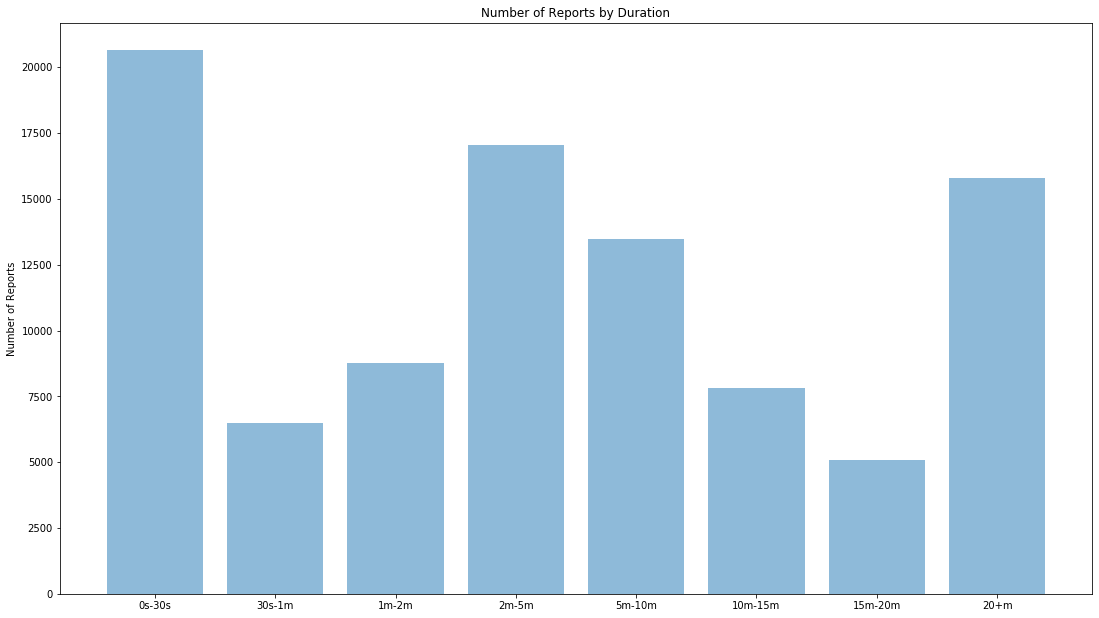

In [28]:


# Create a bar graph depicting the number of reports, separated based on duration
objects = ('0s-30s','30s-1m','1m-2m','2m-5m','5m-10m','10m-15m','15m-20m','20+m')
counts = [20649,6469,8767,17029,13471,7835,5086,15783]

plt.bar(np.arange(len(objects)),counts,align="center",alpha=0.5)
plt.xticks(np.arange(len(objects)),objects)
plt.ylabel('Number of Reports')
plt.title('Number of Reports by Duration')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

In [33]:
reports['shape'].value_counts()

light        22762
circle       18504
sphere       16016
other        15607
triangle     10497
oval          7050
cylinder      4404
formation     3456
changing      2716
flash         1963
rectangle     1848
diamond       1650
chevron       1294
cone           468
cross          344
Name: shape, dtype: int64

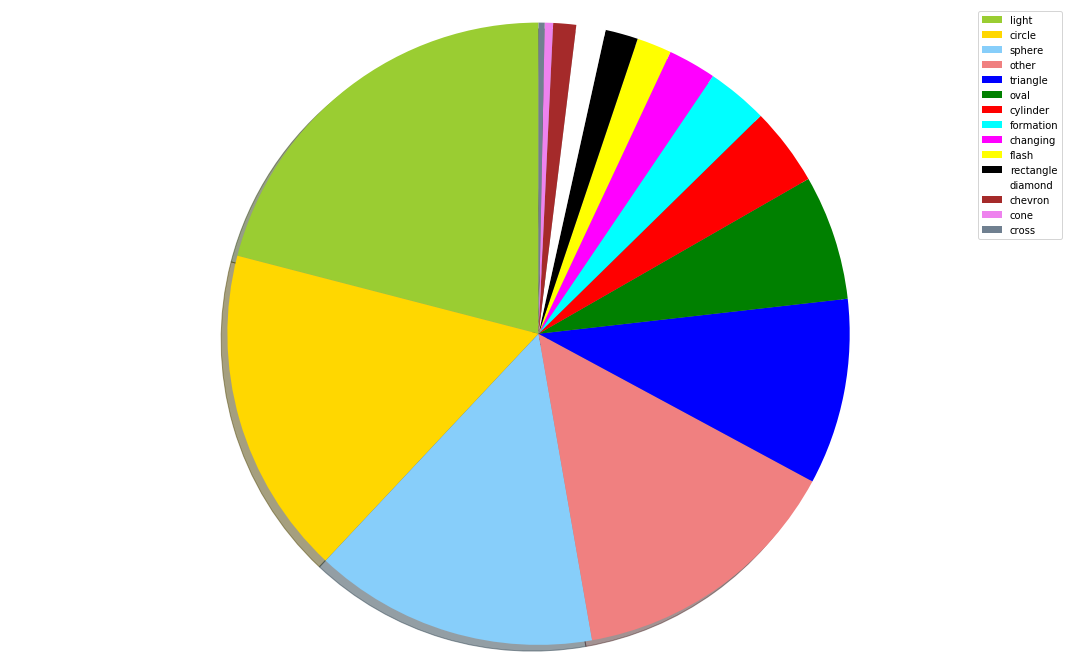

In [29]:
# Create a pie chart depicting the proportions of each report that describe a particular shape

labels = ['light','circle','sphere','other','triangle','oval','cylinder','formation','changing','flash','rectangle','diamond','chevron','cone','cross']
sizes = [22762,18504,16016,15607,10497,7050,4404,3456,2716,1963,1848,1650,1294,468,344]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','blue','green','red','cyan','magenta','yellow','black','white','brown','violet','slategrey']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

fig = plt.gcf()
fig.set_size_inches(15.5, 10.5)

plt.show()